In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# A. Loading Data

In [2]:
hotel_df = pd.read_csv('train.csv')

In [3]:
hotel_df.head()

hotel  is_canceled  lead_time  \
0                    Crystal Cove, Barbados Barbados            0          8   
1                Greensboro Courtyard Greensboro, NC            1        524   
2   The Westin Peachtree Plaza, Atlanta Atlanta, GA             1        175   
3  Courtyard by Marriott Aberdeen Airport Aberdee...            0          0   
4             W New York – Union Square New York, NY            1         33   

   arrival_date_year arrival_date_month  arrival_date_week_number  \
0               2019            January                         2   
1               2018           December                        51   
2               2019                May                        20   
3               2018            October                        43   
4               2017          September                        39   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                         10                        0                     4   
1                         15                        0                     2   
2                         19                        1                     2   
3                         17                        1                     0   
4                         26                        2                     3   

   adults  ...  agent  company days_in_waiting_list customer_type     adr  \
0       2  ...  314.0      NaN                    0     Transient   38.40   
1       2  ...    1.0      NaN                    0     Transient   62.80   
2       2  ...   12.0      NaN                    0     Transient  110.00   
3       1  ...    NaN    200.0                    0     Transient   45.00   
4       2  ...   16.0      NaN                    0     Transient   57.92   

  required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                           0                          0           Check-Out   
1                           0                          0            Canceled   
2                           0                          0            Canceled   
3                           0                          0           Check-Out   
4                           0                          1            Canceled   

   reservation_status_date bookingID  
0               2019-01-14         1  
1               2017-10-21         2  
2               2018-11-25         3  
3               2018-10-18         4  
4               2017-08-24         5  

[5 rows x 33 columns]

# B. Data Cleaning

In [4]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [5]:
hotel_df.describe().T

count          mean           std     min  \
is_canceled                     83293.0      0.369503      0.482673     0.0   
lead_time                       83293.0    103.914230    106.874124     0.0   
arrival_date_year               83293.0   2018.156808      0.706656  2017.0   
arrival_date_week_number        83293.0     27.164023     13.623752     1.0   
arrival_date_day_of_month       83293.0     15.786116      8.775931     1.0   
stays_in_weekend_nights         83293.0      0.930390      1.004196     0.0   
stays_in_week_nights            83293.0      2.503812      1.924511     0.0   
adults                          83293.0      1.854466      0.606139     0.0   
children                        83290.0      0.103614      0.398821     0.0   
babies                          83293.0      0.008032      0.100641     0.0   
is_repeated_guest               83293.0      0.030243      0.171255     0.0   
previous_cancellations          83293.0      0.086994      0.862988     0.0   
previous_bookings_not_canceled  83293.0      0.141765      1.554390     0.0   
booking_changes                 83293.0      0.223068      0.656237     0.0   
agent                           71889.0     86.867282    110.875605     1.0   
company                          4734.0    190.003802    131.969152     6.0   
days_in_waiting_list            83293.0      2.352238     17.820652     0.0   
adr                             83293.0    101.724373     48.082552     0.0   
required_car_parking_spaces     83293.0      0.061818      0.245027     0.0   
total_of_special_requests       83293.0      0.571945      0.793742     0.0   
bookingID                       83293.0  41647.000000  24044.762323     1.0   

                                     25%      50%      75%      max  
is_canceled                         0.00      0.0      1.0      1.0  
lead_time                          18.00     69.0    160.0    737.0  
arrival_date_year                2018.00   2018.0   2019.0   2019.0  
arrival_date_week_number           16.00     27.0     38.0     53.0  
arrival_date_day_of_month           8.00     16.0     23.0     31.0  
stays_in_weekend_nights             0.00      1.0      2.0     19.0  
stays_in_week_nights                1.00      2.0      3.0     50.0  
adults                              2.00      2.0      2.0     55.0  
children                            0.00      0.0      0.0     10.0  
babies                              0.00      0.0      0.0     10.0  
is_repeated_guest                   0.00      0.0      0.0      1.0  
previous_cancellations              0.00      0.0      0.0     26.0  
previous_bookings_not_canceled      0.00      0.0      0.0     70.0  
booking_changes                     0.00      0.0      0.0     21.0  
agent                               9.00     14.0    229.0    535.0  
company                            62.00    183.0    270.0    543.0  
days_in_waiting_list                0.00      0.0      0.0    391.0  
adr                                69.53     94.5    126.0    508.0  
required_car_parking_spaces         0.00      0.0      0.0      8.0  
total_of_special_requests           0.00      0.0      1.0      5.0  
bookingID                       20824.00  41647.0  62470.0  83293.0

In [6]:
null_info = []

for col in hotel_df.columns:
    null_sum = hotel_df[col].isna().sum()
    null_percentage = null_sum * 100 / len(hotel_df)
    
    if null_percentage >0:
        null_info.append([col, null_sum, null_percentage])
        
null_info_hotel = pd.DataFrame(null_info, columns=['Column', 'Null Sum','Null (%)'])        

In [7]:
null_info_hotel

Column  Null Sum   Null (%)
0  children         3   0.003602
1   country       346   0.415401
2     agent     11404  13.691427
3   company     78559  94.316449

In [8]:
columns_with_nulls = hotel_df.columns[hotel_df.isna().any()].tolist()

for col in columns_with_nulls:
    print(hotel_df[col].value_counts(), '\n')

children
0.0     77329
1.0      3351
2.0      2558
3.0        51
10.0        1
Name: count, dtype: int64 

country
PRT    33952
GBR     8381
FRA     7243
ESP     5897
DEU     5107
       ...  
MRT        1
BRB        1
NPL        1
DJI        1
NAM        1
Name: count, Length: 165, dtype: int64 

agent
9.0      22305
240.0     9667
1.0       4943
14.0      2529
7.0       2511
         ...  
337.0        1
352.0        1
299.0        1
446.0        1
144.0        1
Name: count, Length: 320, dtype: int64 

company
40.0     655
223.0    541
67.0     196
45.0     178
153.0    149
        ... 
96.0       1
140.0      1
18.0       1
491.0      1
304.0      1
Name: count, Length: 327, dtype: int64 



In [9]:
hotel_df.reservation_status.value_counts()

reservation_status
Check-Out    52516
Canceled     29923
No-Show        854
Name: count, dtype: int64

- children : 0 -> it means no children
- country : unknown
- agent : 0 -> it means self booking
- company : 0 -> it means privately

In [10]:
null_replacements = {'children':0, 'country':'Unknown', 'agent':0, 'company':0}
hotel_df = hotel_df.fillna(null_replacements)

Remove the row with adult = 0 & children = 0 & babies = 0

In [11]:
filter_hotel = (hotel_df['adults'] == 0)| ((hotel_df['adults'] == 0) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0))
hotel_df = hotel_df[~filter_hotel]
hotel_df

hotel  is_canceled  \
0                        Crystal Cove, Barbados Barbados            0   
1                    Greensboro Courtyard Greensboro, NC            1   
2       The Westin Peachtree Plaza, Atlanta Atlanta, GA             1   
3      Courtyard by Marriott Aberdeen Airport Aberdee...            0   
4                 W New York – Union Square New York, NY            1   
...                                                  ...          ...   
83288                    Crystal Cove, Barbados Barbados            0   
83289              Berlin Marriott Hotel Berlin, Germany            0   
83290               The Ritz-Carlton, Tokyo Tokyo, Japan            0   
83291                     Colony Club, Barbados Barbados            0   
83292                  Las Vegas Marriott Las Vegas, NV             0   

       lead_time  arrival_date_year arrival_date_month  \
0              8               2019            January   
1            524               2018           December   
2            175               2019                May   
3              0               2018            October   
4             33               2017          September   
...          ...                ...                ...   
83288          4               2018            October   
83289         30               2017          September   
83290        165               2019               June   
83291        180               2018               July   
83292        290               2018            October   

       arrival_date_week_number  arrival_date_day_of_month  \
0                             2                         10   
1                            51                         15   
2                            20                         19   
3                            43                         17   
4                            39                         26   
...                         ...                        ...   
83288                        44                         25   
83289                        38                         14   
83290                        25                         21   
83291                        32                         31   
83292                        43                         20   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                            0                     4       2  ...  314.0   
1                            0                     2       2  ...    1.0   
2                            1                     2       2  ...   12.0   
3                            1                     0       1  ...    0.0   
4                            2                     3       2  ...   16.0   
...                        ...                   ...     ...  ...    ...   
83288                        0                     2       2  ...    9.0   
83289                        1                     3       2  ...    9.0   
83290                        4                    10       2  ...    0.0   
83291                        2                     4       2  ...    9.0   
83292                        2                     3       2  ...    9.0   

       company days_in_waiting_list    customer_type     adr  \
0          0.0                    0        Transient   38.40   
1          0.0                    0        Transient   62.80   
2          0.0                    0        Transient  110.00   
3        200.0                    0        Transient   45.00   
4          0.0                    0        Transient   57.92   
...        ...                  ...              ...     ...   
83288      0.0                    0        Transient  169.00   
83289      0.0                    0        Transient   94.50   
83290      0.0                    0        Transient  123.50   
83291      0.0                    0        Transient  122.25   
83292      0.0                    0  Transient-Party   90.95   

      required_car_parking_spaces  total_of_specia

In [12]:
filter_stay = (hotel_df['stays_in_week_nights'] == 0)& (hotel_df['stays_in_weekend_nights'] == 0)
hotel_df = hotel_df[~filter_stay]
hotel_df

hotel  is_canceled  \
0                        Crystal Cove, Barbados Barbados            0   
1                    Greensboro Courtyard Greensboro, NC            1   
2       The Westin Peachtree Plaza, Atlanta Atlanta, GA             1   
3      Courtyard by Marriott Aberdeen Airport Aberdee...            0   
4                 W New York – Union Square New York, NY            1   
...                                                  ...          ...   
83288                    Crystal Cove, Barbados Barbados            0   
83289              Berlin Marriott Hotel Berlin, Germany            0   
83290               The Ritz-Carlton, Tokyo Tokyo, Japan            0   
83291                     Colony Club, Barbados Barbados            0   
83292                  Las Vegas Marriott Las Vegas, NV             0   

       lead_time  arrival_date_year arrival_date_month  \
0              8               2019            January   
1            524               2018           December   
2            175               2019                May   
3              0               2018            October   
4             33               2017          September   
...          ...                ...                ...   
83288          4               2018            October   
83289         30               2017          September   
83290        165               2019               June   
83291        180               2018               July   
83292        290               2018            October   

       arrival_date_week_number  arrival_date_day_of_month  \
0                             2                         10   
1                            51                         15   
2                            20                         19   
3                            43                         17   
4                            39                         26   
...                         ...                        ...   
83288                        44                         25   
83289                        38                         14   
83290                        25                         21   
83291                        32                         31   
83292                        43                         20   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                            0                     4       2  ...  314.0   
1                            0                     2       2  ...    1.0   
2                            1                     2       2  ...   12.0   
3                            1                     0       1  ...    0.0   
4                            2                     3       2  ...   16.0   
...                        ...                   ...     ...  ...    ...   
83288                        0                     2       2  ...    9.0   
83289                        1                     3       2  ...    9.0   
83290                        4                    10       2  ...    0.0   
83291                        2                     4       2  ...    9.0   
83292                        2                     3       2  ...    9.0   

       company days_in_waiting_list    customer_type     adr  \
0          0.0                    0        Transient   38.40   
1          0.0                    0        Transient   62.80   
2          0.0                    0        Transient  110.00   
3        200.0                    0        Transient   45.00   
4          0.0                    0        Transient   57.92   
...        ...                  ...              ...     ...   
83288      0.0                    0        Transient  169.00   
83289      0.0                    0        Transient   94.50   
83290      0.0                    0        Transient  123.50   
83291      0.0                    0        Transient  122.25   
83292      0.0                    0  Transient-Party   90.95   

      required_car_parking_spaces  total_of_specia

In [13]:
filter_adr = (hotel_df['adr'] == 0)
hotel_df = hotel_df[~filter_adr]
hotel_df

hotel  is_canceled  \
0                        Crystal Cove, Barbados Barbados            0   
1                    Greensboro Courtyard Greensboro, NC            1   
2       The Westin Peachtree Plaza, Atlanta Atlanta, GA             1   
3      Courtyard by Marriott Aberdeen Airport Aberdee...            0   
4                 W New York – Union Square New York, NY            1   
...                                                  ...          ...   
83288                    Crystal Cove, Barbados Barbados            0   
83289              Berlin Marriott Hotel Berlin, Germany            0   
83290               The Ritz-Carlton, Tokyo Tokyo, Japan            0   
83291                     Colony Club, Barbados Barbados            0   
83292                  Las Vegas Marriott Las Vegas, NV             0   

       lead_time  arrival_date_year arrival_date_month  \
0              8               2019            January   
1            524               2018           December   
2            175               2019                May   
3              0               2018            October   
4             33               2017          September   
...          ...                ...                ...   
83288          4               2018            October   
83289         30               2017          September   
83290        165               2019               June   
83291        180               2018               July   
83292        290               2018            October   

       arrival_date_week_number  arrival_date_day_of_month  \
0                             2                         10   
1                            51                         15   
2                            20                         19   
3                            43                         17   
4                            39                         26   
...                         ...                        ...   
83288                        44                         25   
83289                        38                         14   
83290                        25                         21   
83291                        32                         31   
83292                        43                         20   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                            0                     4       2  ...  314.0   
1                            0                     2       2  ...    1.0   
2                            1                     2       2  ...   12.0   
3                            1                     0       1  ...    0.0   
4                            2                     3       2  ...   16.0   
...                        ...                   ...     ...  ...    ...   
83288                        0                     2       2  ...    9.0   
83289                        1                     3       2  ...    9.0   
83290                        4                    10       2  ...    0.0   
83291                        2                     4       2  ...    9.0   
83292                        2                     3       2  ...    9.0   

       company days_in_waiting_list    customer_type     adr  \
0          0.0                    0        Transient   38.40   
1          0.0                    0        Transient   62.80   
2          0.0                    0        Transient  110.00   
3        200.0                    0        Transient   45.00   
4          0.0                    0        Transient   57.92   
...        ...                  ...              ...     ...   
83288      0.0                    0        Transient  169.00   
83289      0.0                    0        Transient   94.50   
83290      0.0                    0        Transient  123.50   
83291      0.0                    0        Transient  122.25   
83292      0.0                    0  Transient-Party   90.95   

      required_car_parking_spaces  total_of_specia

In [14]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81724 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81724 non-null  object 
 1   is_canceled                     81724 non-null  int64  
 2   lead_time                       81724 non-null  int64  
 3   arrival_date_year               81724 non-null  int64  
 4   arrival_date_month              81724 non-null  object 
 5   arrival_date_week_number        81724 non-null  int64  
 6   arrival_date_day_of_month       81724 non-null  int64  
 7   stays_in_weekend_nights         81724 non-null  int64  
 8   stays_in_week_nights            81724 non-null  int64  
 9   adults                          81724 non-null  int64  
 10  children                        81724 non-null  float64
 11  babies                          81724 non-null  int64  
 12  meal                            81724

In [15]:
hotel_df.duplicated(subset = 'bookingID').sum()

0

In [16]:
hotel_df[['children','agent','company']] = hotel_df[['children','agent','company']].astype(int)

In [17]:
(83293 - 81724)*100/83293

1.883711716470772

In [18]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81724 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81724 non-null  object 
 1   is_canceled                     81724 non-null  int64  
 2   lead_time                       81724 non-null  int64  
 3   arrival_date_year               81724 non-null  int64  
 4   arrival_date_month              81724 non-null  object 
 5   arrival_date_week_number        81724 non-null  int64  
 6   arrival_date_day_of_month       81724 non-null  int64  
 7   stays_in_weekend_nights         81724 non-null  int64  
 8   stays_in_week_nights            81724 non-null  int64  
 9   adults                          81724 non-null  int64  
 10  children                        81724 non-null  int64  
 11  babies                          81724 non-null  int64  
 12  meal                            81724

In [19]:
hotel_df.to_csv("hotel_df_after_cleaning.csv", index = False)

In [20]:
hotel_df2 = hotel_df.copy()

In [21]:
hotel_df3 = hotel_df.copy()

# C. Exploratory Data Analysis

### In this case, I divided the features into several categories:
#### General Information: 
- bookingID, 
- hotel
#### Reservation Status : 
- is_canceled, 
- reservation_status
#### Time-related Booking Information:
- lead_time,
- arrival_date_year,
- arrival_date_month,
- arrival_date_week_number,
- arrival_date_day_of_month,
- reservation_status_date
#### Demographics:
- adults, 
- children, 
- babies, 
- country, 
- market_segment,
- customer_type, 
- distribution_channel
#### Historical Booking Information: 
- is_repeated_guest, 
- previous_cancellation, 
- previous_bookings_not_canceled
#### Duration of stay: 
- stays_in_weekend_nights,
- stays_in_week_nights,
#### Meal and Room Type:
- meal
- reserved_car_parking_spaces,
- total_of_special_requests,
#### Special Requests:
- required_car_parking_spaces,
- total_of_special_requests,
#### Booking Process:
- booking_changes,
- deposit_type,
- agent,
- company,
- days_in_waiting_list,
#### Financial Information:
- adr

In [22]:
numericals = hotel_df.select_dtypes(include=['int64','float64']).columns.tolist()
numericals

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'bookingID']

In [23]:
hotel_df[numericals].describe().T

count          mean           std      min  \
is_canceled                     81724.0      0.374211      0.483921     0.00   
lead_time                       81724.0    104.949134    106.923593     0.00   
arrival_date_year               81724.0   2018.160296      0.705986  2017.00   
arrival_date_week_number        81724.0     27.132727     13.592992     1.00   
arrival_date_day_of_month       81724.0     15.785840      8.776999     1.00   
stays_in_weekend_nights         81724.0      0.938623      1.000447     0.00   
stays_in_week_nights            81724.0      2.523787      1.907728     0.00   
adults                          81724.0      1.862170      0.476244     1.00   
children                        81724.0      0.100668      0.391421     0.00   
babies                          81724.0      0.007954      0.100464     0.00   
is_repeated_guest               81724.0      0.026247      0.159870     0.00   
previous_cancellations          81724.0      0.087061      0.868546     0.00   
previous_bookings_not_canceled  81724.0      0.129729      1.503837     0.00   
booking_changes                 81724.0      0.217060      0.630977     0.00   
agent                           81724.0     75.483603    107.411736     0.00   
company                         81724.0     10.575388     53.679151     0.00   
days_in_waiting_list            81724.0      2.372082     17.918355     0.00   
adr                             81724.0    103.496818     46.618213     0.26   
required_car_parking_spaces     81724.0      0.062050      0.245522     0.00   
total_of_special_requests       81724.0      0.570542      0.791849     0.00   
bookingID                       81724.0  41649.946295  24046.134888     1.00   

                                     25%      50%       75%      max  
is_canceled                         0.00      0.0      1.00      1.0  
lead_time                          19.00     70.0    161.00    629.0  
arrival_date_year                2018.00   2018.0   2019.00   2019.0  
arrival_date_week_number           16.00     27.0     38.00     53.0  
arrival_date_day_of_month           8.00     16.0     23.00     31.0  
stays_in_weekend_nights             0.00      1.0      2.00     19.0  
stays_in_week_nights                1.00      2.0      3.00     50.0  
adults                              2.00      2.0      2.00      4.0  
children                            0.00      0.0      0.00     10.0  
babies                              0.00      0.0      0.00     10.0  
is_repeated_guest                   0.00      0.0      0.00      1.0  
previous_cancellations              0.00      0.0      0.00     26.0  
previous_bookings_not_canceled      0.00      0.0      0.00     70.0  
booking_changes                     0.00      0.0      0.00     16.0  
agent                               7.00      9.0    155.00    535.0  
company                             0.00      0.0      0.00    543.0  
days_in_waiting_list                0.00      0.0      0.00    391.0  
adr                                71.00     95.0    126.00    508.0  
required_car_parking_spaces         0.00      0.0      0.00      8.0  
total_of_special_requests           0.00      0.0      1.00      5.0  
bookingID                       20822.75  41651.5  62482.25  83293.0

In [24]:
categoricals = hotel_df.select_dtypes(include = ['object']).columns.tolist()
categoricals

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [25]:
hotel_df[categoricals].describe().T

count unique  \
hotel                    81724     64   
arrival_date_month       81724     12   
meal                     81724      5   
country                  81724    166   
market_segment           81724      8   
distribution_channel     81724      5   
reserved_room_type       81724      9   
assigned_room_type       81724     10   
deposit_type             81724      3   
customer_type            81724      4   
reservation_status       81724      3   
reservation_status_date  81724    913   

                                                                       top  \
hotel                    Renaissance New York Times Square Hotel New Yo...   
arrival_date_month                                                  August   
meal                                                                    BB   
country                                                                PRT   
market_segment                                                   Online TA   
distribution_channel                                                 TA/TO   
reserved_room_type                                                       A   
assigned_room_type                                                       A   
deposit_type                                                    No Deposit   
customer_type                                                    Transient   
reservation_status                                               Check-Out   
reservation_status_date                                         2017-10-21   

                          freq  
hotel                     1352  
arrival_date_month        9490  
meal                     63200  
country                  32812  
market_segment           39037  
distribution_channel     67536  
reserved_room_type       59037  
assigned_room_type       51093  
deposit_type             71410  
customer_type            61398  
reservation_status       51142  
reservation_status_date   1020

## C.1 Trend

In [26]:
hotel_df_trend = pd.DataFrame(hotel_df)
hotel_df_trend['day'] = hotel_df['arrival_date_year'].astype(str) + '-' + hotel_df['arrival_date_month'].astype(str) + '-' + hotel_df['arrival_date_day_of_month'].astype(str)
hotel_df_trend['day'] = pd.to_datetime(hotel_df_trend['day'], errors='coerce')

daily_trend = hotel_df_trend.groupby(['day', 'is_canceled']).size().unstack(fill_value=0).reset_index()
daily_trend.columns = ['day', 'not_canceled', 'canceled']
daily_trend['total_booking'] = daily_trend['not_canceled'] + daily_trend['canceled']
daily_trend['canceled_ratio'] = (daily_trend['canceled']*100/daily_trend['total_booking']).round(2)
daily_trend = daily_trend.sort_values(by=['day'], key=pd.to_datetime).reset_index(drop=True)

daily_trend

day  not_canceled  canceled  total_booking  canceled_ratio
0   2017-07-01            66        12             78           15.38
1   2017-07-02            26        21             47           44.68
2   2017-07-03            22        12             34           35.29
3   2017-07-04            33        29             62           46.77
4   2017-07-05            25        12             37           32.43
..         ...           ...       ...            ...             ...
787 2019-08-27            92        34            126           26.98
788 2019-08-28            95        45            140           32.14
789 2019-08-29            59        33             92           35.87
790 2019-08-30            42        19             61           31.15
791 2019-08-31            61        30             91           32.97

[792 rows x 5 columns]

In [27]:
daily_trend.sort_values(by = ['canceled_ratio'],ascending = False).iloc[:60]

day  not_canceled  canceled  total_booking  canceled_ratio
160 2017-12-08            16       116            132           87.88
231 2018-02-17            51       150            201           74.63
94  2017-10-03            37       108            145           74.48
664 2019-04-26            52       142            194           73.20
687 2019-05-19            62       162            224           72.32
21  2017-07-22            25        56             81           69.14
242 2018-02-28            44        98            142           69.01
457 2018-10-01            42        82            124           66.13
287 2018-04-14            50        95            145           65.52
494 2018-11-07            86       161            247           65.18
580 2019-02-01            39        70            109           64.22
205 2018-01-22            32        56             88           63.64
44  2017-08-14            84       147            231           63.64
698 2019-05-30            56        98            154           63.64
20  2017-07-21            19        33             52           63.46
107 2017-10-16            89       151            240           62.92
707 2019-06-08            93       155            248           62.50
683 2019-05-15            86       142            228           62.28
488 2018-11-01            57        94            151           62.25
478 2018-10-22            45        74            119           62.18
348 2018-06-14            64       103            167           61.68
477 2018-10-21            65       103            168           61.31
342 2018-06-08            52        82            134           61.19
471 2018-10-15            36        56             92           60.87
240 2018-02-26            56        87            143           60.84
79  2017-09-18            99       150            249           60.24
33  2017-08-03            51        77            128           60.16
19  2017-07-20            36        54             90           60.00
571 2019-01-23            51        76            127           59.84
659 2019-04-21            62        92            154           59.74
66  2017-09-05            67        99            166           59.64
644 2019-04-06            66        97            163           59.51
490 2018-11-03            69       101            170           59.41
346 2018-06-12            65        95            160           59.38
341 2018-06-07            42        61            103           59.22
115 2017-10-24            47        68            115           59.13
469 2018-10-13            90       130            220           59.09
562 2019-01-14            68        97            165           58.79
210 2018-01-27            41        58             99           58.59
87  2017-09-26            57        80            137           58.39
85  2017-09-24            61        85            146           58.22
71  2017-09-10            39        54             93           58.06
434 2018-09-08            59        81            140           57.86
327 2018-05-24            65        89            154           57.79
672 2019-05-04            73        99            172           57.56
543 2018-12-26            49        66            115           57.39
671 2019-05-03            61        82            143           57.34
78  2017-09-17            97       130            227           57.27
12  2017-07-13            26        34             60           56.67
491 2018-11-04            72        93            165           56.36
628 2019-03-21            45        58            103           56.31
26  2017-07-27            49        63            112           56.25
8   2017-07-09            18        23             41           56.10
688 2019-05-20            73        93            166           56.02
57  2017-08-27            26        33             59           55.93
433 2018-09-07            42        53             95           55.79
316 2018-05-13       

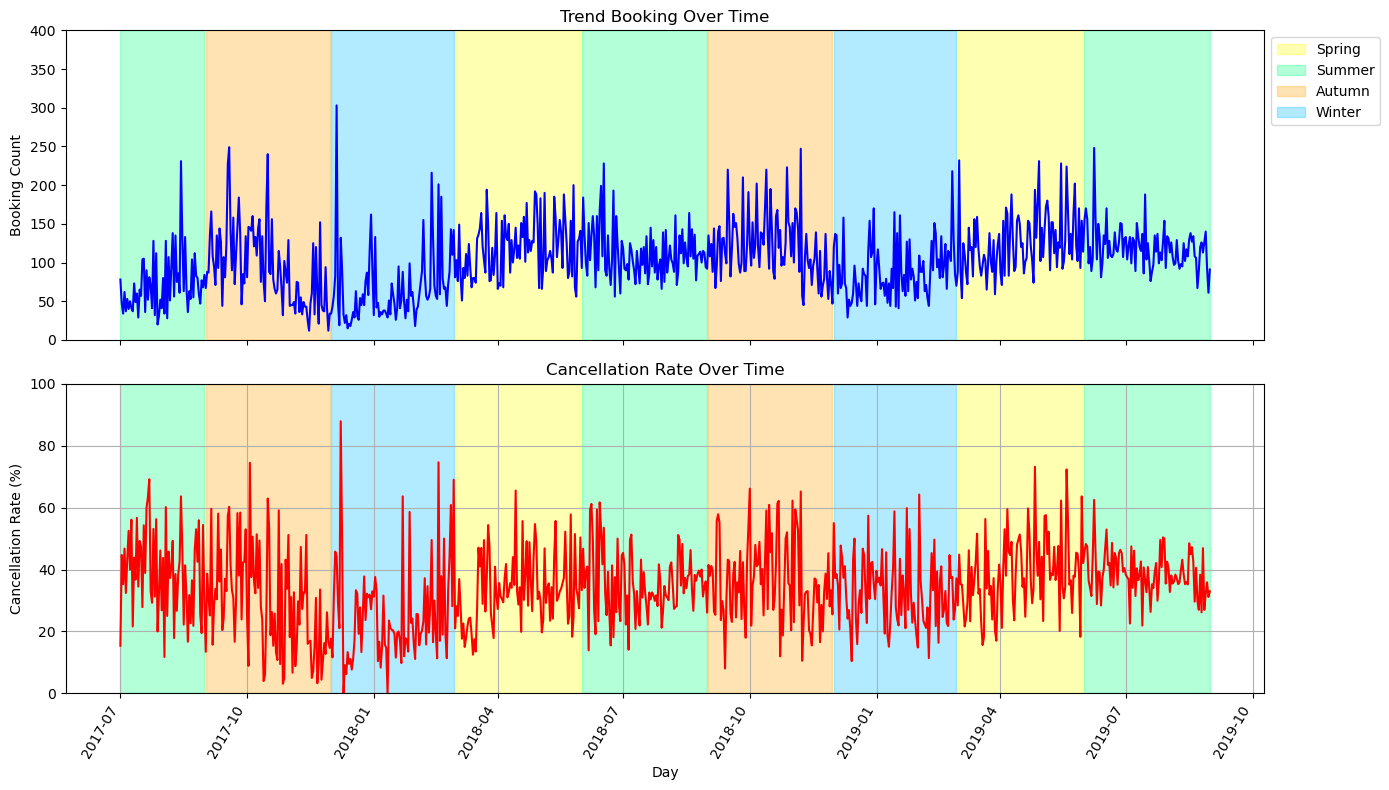

In [28]:
import matplotlib.patches as mpatches

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot pertama: Trend Total Booking
ax1.plot(daily_trend['day'], daily_trend['total_booking'], linestyle='-', color='blue', label='Total Booking')
ax1.set_title('Trend Booking Over Time')
ax1.set_ylabel('Booking Count')

# Subplot kedua: Cancellation Rate
ax2.plot(daily_trend['day'], daily_trend['canceled_ratio'], linestyle='-', color='red', label='Cancellation Rate')
ax2.set_title('Cancellation Rate Over Time')
ax2.set_ylabel('Cancellation Rate (%)')
ax2.set_xlabel('Day')

# Define date ranges and corresponding colors
date_ranges = [
    ('2017-07-01', '2017-08-31', 'springgreen'),
    ('2017-09-01', '2017-11-30', 'orange'),
    ('2017-12-01', '2018-02-28', 'deepskyblue'),
    ('2018-03-01', '2018-05-31', 'yellow'),
    ('2018-06-01', '2018-08-31', 'springgreen'),
    ('2018-09-01', '2018-11-30', 'orange'),
    ('2018-12-01', '2019-02-28', 'deepskyblue'),
    ('2019-03-01', '2019-05-31', 'yellow'),
    ('2019-06-01', '2019-08-31', 'springgreen'),
]

# Shade the background based on date ranges and colors
for start, end, color in date_ranges:
    ax1.axvspan(start, end, color=color, alpha=0.3)
    ax2.axvspan(start, end, color=color, alpha=0.3)

# Create a single legend for both subplots
patches = [
    mpatches.Patch(color='yellow', label='Spring', alpha=0.3),
    mpatches.Patch(color='springgreen', label='Summer', alpha=0.3),
    mpatches.Patch(color='orange', label='Autumn', alpha=0.3),
    mpatches.Patch(color='deepskyblue', label='Winter', alpha=0.3)
]

# Add the patches to the plot
ax1.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 1))

# Hide the legend in the second subplot
ax2.legend().set_visible(False)

ax1.set_ylim(0, 400)
ax2.set_ylim(0, 100)

plt.xticks(rotation=60, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
hotel_df_month = pd.DataFrame(hotel_df)
hotel_df_month['month'] = hotel_df['arrival_date_year'].astype(str) + ' ' + hotel_df['arrival_date_month']

monthly_trend = hotel_df_month.groupby(['month', 'is_canceled']).size().unstack(fill_value=0).reset_index()
monthly_trend.columns = ['month', 'not_canceled', 'canceled']
monthly_trend['total_booking'] = monthly_trend['not_canceled'] + monthly_trend['canceled']
monthly_trend['canceled_ratio'] = monthly_trend['canceled']*100/monthly_trend['total_booking']
monthly_trend = monthly_trend.sort_values(by=['month'], key=pd.to_datetime).reset_index(drop=True)

monthly_trend

month  not_canceled  canceled  total_booking  canceled_ratio
0        2017 July          1005       802           1807       44.382955
1      2017 August          1543      1076           2619       41.084383
2   2017 September          2095      1429           3524       40.550511
3     2017 October          2195      1187           3382       35.097575
4    2017 November          1246       337           1583       21.288692
5    2017 December          1288       663           1951       33.982573
6     2018 January          1156       388           1544       25.129534
7    2018 February          1665       960           2625       36.571429
8       2018 March          2273      1015           3288       30.869830
9       2018 April          2331      1445           3776       38.268008
10        2018 May          2420      1349           3769       35.791987
11       2018 June          2224      1459           3683       39.614445
12       2018 July          2081      1031           3112       33.129820
13     2018 August          2199      1263           3462       36.481802
14  2018 September          2368      1384           3752       36.886994
15    2018 October          2463      1722           4185       41.146953
16   2018 November          1920      1153           3073       37.520338
17   2018 December          1654       969           2623       36.942432
18    2019 January          1668       900           2568       35.046729
19   2019 February          1888       936           2824       33.144476
20      2019 March          2235      1165           3400       34.264706
21      2019 April          2183      1714           3897       43.982551
22        2019 May          2404      1899           4303       44.132001
23       2019 June          2214      1678           3892       43.114080
24       2019 July          2279      1394           3673       37.952627
25     2019 August          2145      1264           3409       37.078322

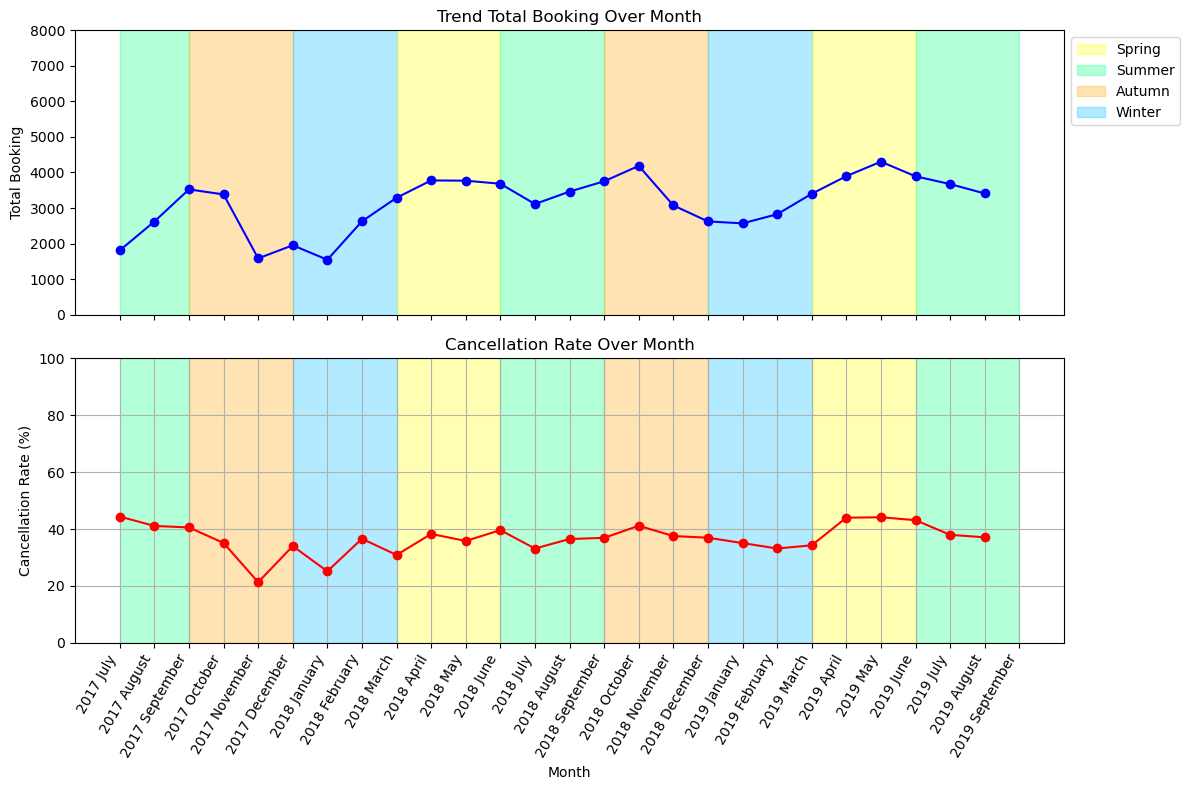

In [30]:
import matplotlib.patches as mpatches

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Subplot pertama: Trend Total Booking
ax1.plot(monthly_trend['month'], monthly_trend['total_booking'], marker='o', linestyle='-', color='blue', label='Total Booking')
ax1.set_title('Trend Total Booking Over Month')
ax1.set_ylabel('Total Booking')

# Subplot kedua: Cancellation Rate
ax2.plot(monthly_trend['month'], monthly_trend['canceled_ratio'], marker='o', linestyle='-', color='red', label='Cancellation Rate')
ax2.set_title('Cancellation Rate Over Month')
ax2.set_ylabel('Cancellation Rate (%)')
ax2.set_xlabel('Month')

# Define date ranges and corresponding colors
date_ranges = [
    ('2017 July', '2017 September', 'springgreen'),
    ('2017 September', '2017 December', 'orange'),
    ('2017 December', '2018 March', 'deepskyblue'),
    ('2018 March', '2018 June', 'yellow'),
    ('2018 June', '2018 September', 'springgreen'),
    ('2018 September', '2018 December', 'orange'),
    ('2018 December', '2019 March', 'deepskyblue'),
    ('2019 March', '2019 June', 'yellow'),
    ('2019 June', '2019 September', 'springgreen'),
]

# Shade the background based on date ranges and colors
for start, end, color in date_ranges:
    ax1.axvspan(start, end, color=color, alpha=0.3)
    ax2.axvspan(start, end, color=color, alpha=0.3)

# Create a single legend for both subplots
patches = [
    mpatches.Patch(color='yellow', label='Spring', alpha=0.3),
    mpatches.Patch(color='springgreen', label='Summer', alpha=0.3),
    mpatches.Patch(color='orange', label='Autumn', alpha=0.3),
    mpatches.Patch(color='deepskyblue', label='Winter', alpha=0.3)
]

# Add the patches to the plot
ax1.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 1))

# Hide the legend in the second subplot
ax2.legend().set_visible(False)

ax1.set_ylim(0, 8000)
ax2.set_ylim(0, 100)

plt.xticks(rotation=60, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
adr_df = pd.DataFrame(hotel_df)

adr_df['day'] = pd.to_datetime(adr_df['arrival_date_year'].astype(str) + '-' + adr_df['arrival_date_month'].astype(str) + '-' + adr_df['arrival_date_day_of_month'].astype(str), errors='coerce')
adr_df['adr_not_canceled'] = adr_df['adr'] * (1 - adr_df['is_canceled'])
adr_df['adr_canceled'] = adr_df['adr'] * adr_df['is_canceled']

adr_trend_df = adr_df.groupby('day')[['adr_not_canceled', 'adr_canceled']].sum().reset_index()

adr_trend_df

day  adr_not_canceled  adr_canceled
0   2017-07-01           6491.07       1120.50
1   2017-07-02           2621.20       1672.73
2   2017-07-03           2195.29       1192.83
3   2017-07-04           2866.43       2318.50
4   2017-07-05           2695.38        883.88
..         ...               ...           ...
787 2019-08-27          13174.42       5850.03
788 2019-08-28          13137.84       8213.27
789 2019-08-29           8240.67       5275.41
790 2019-08-30           6222.74       3227.88
791 2019-08-31           8973.95       4924.87

[792 rows x 3 columns]

In [32]:
adr_trend_df.describe()

day  adr_not_canceled  adr_canceled
count                  792        792.000000    792.000000
mean   2018-07-31 12:00:00       6615.234306   4058.232879
min    2017-07-01 00:00:00        607.190000      0.000000
25%    2018-01-14 18:00:00       4066.237500   1647.712500
50%    2018-07-31 12:00:00       6611.225000   3439.005000
75%    2019-02-14 06:00:00       8794.130000   5688.557500
max    2019-08-31 00:00:00      19821.830000  22559.500000
std                    NaN       3246.578438   3152.465829

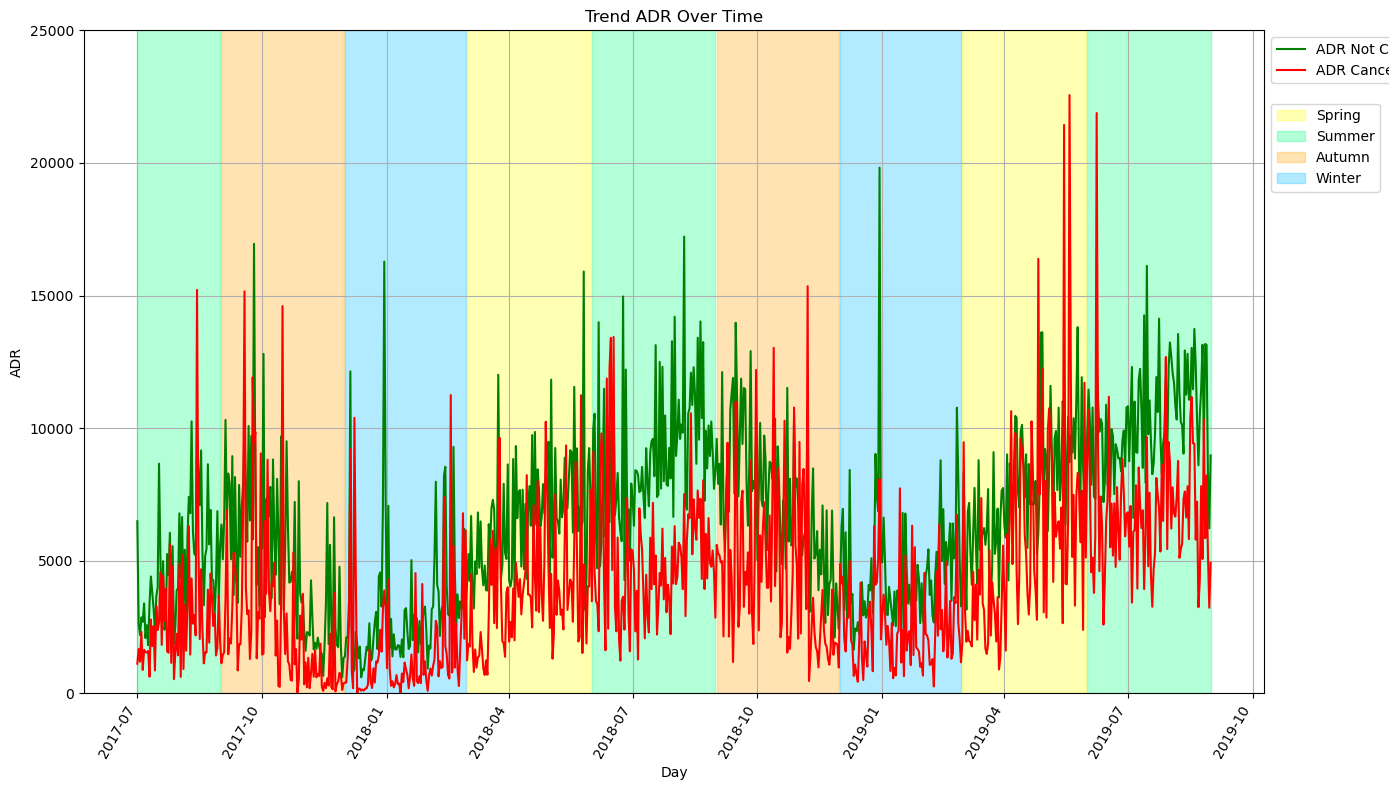

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Assuming adr_trend_df is your DataFrame with columns 'day', 'adr_not_canceled', and 'adr_canceled'

fig, ax = plt.subplots(figsize=(14, 8))

# Tren ADR Not Canceled
line1, = ax.plot(adr_trend_df['day'], adr_trend_df['adr_not_canceled'], linestyle='-', color='green', label='ADR Not Canceled')

# Tren ADR Canceled
line2, = ax.plot(adr_trend_df['day'], adr_trend_df['adr_canceled'], linestyle='-', color='red', label='ADR Canceled')

ax.set_title('Trend ADR Over Time')
ax.set_ylabel('ADR')
ax.set_xlabel('Day')

# Define date ranges and corresponding colors
date_ranges = [
    ('2017-07-01', '2017-08-31', 'springgreen'),
    ('2017-09-01', '2017-11-30', 'orange'),
    ('2017-12-01', '2018-02-28', 'deepskyblue'),
    ('2018-03-01', '2018-05-31', 'yellow'),
    ('2018-06-01', '2018-08-31', 'springgreen'),
    ('2018-09-01', '2018-11-30', 'orange'),
    ('2018-12-01', '2019-02-28', 'deepskyblue'),
    ('2019-03-01', '2019-05-31', 'yellow'),
    ('2019-06-01', '2019-08-31', 'springgreen'),
]

# Shade the background based on date ranges and colors
for start, end, color in date_ranges:
    ax.axvspan(start, end, color=color, alpha=0.3)

# Create a legend for the line plot
legend1 = ax.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(1, 1))

# Create a legend for the date ranges (grid)
date_legend = [
    mpatches.Patch(color='yellow', label='Spring', alpha=0.3),
    mpatches.Patch(color='springgreen', label='Summer', alpha=0.3),
    mpatches.Patch(color='orange', label='Autumn', alpha=0.3),
    mpatches.Patch(color='deepskyblue', label='Winter', alpha=0.3)
]

legend2 = ax.legend(handles=date_legend, loc='upper left', bbox_to_anchor=(1, 0.9))

# Add legend1 back to the plot
ax.add_artist(legend1)

ax.set_ylim(0, 25000)
plt.xticks(rotation=60, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


## C.2 Seasonality

In [34]:
monthly_count = hotel_df.groupby(['arrival_date_month', 'arrival_date_year', 'is_canceled']).size().unstack(fill_value=0).reset_index()
monthly_count.columns = ['arrival_date_month', 'arrival_date_year', 'not_canceled', 'canceled']

# Hitung total_booking dan rate_cancellation
monthly_count['total_booking'] = monthly_count['not_canceled'] + monthly_count['canceled']
monthly_count['cancellation_rate'] = (monthly_count['canceled'] / monthly_count['total_booking']) * 100

# Group by 'arrival_date_month' and calculate the mean for each component
montly_seasonality = monthly_count.groupby('arrival_date_month')[['not_canceled', 'canceled', 'total_booking', 'cancellation_rate']].mean().reset_index()

# Urutkan berdasarkan urutan bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
montly_seasonality['arrival_date_month'] = pd.Categorical(montly_seasonality['arrival_date_month'], categories=month_order, ordered=True)
montly_seasonality = montly_seasonality.sort_values('arrival_date_month').reset_index(drop=True).round(2)

montly_seasonality

arrival_date_month  not_canceled  canceled  total_booking  \
0             January       1412.00    644.00        2056.00   
1            February       1776.50    948.00        2724.50   
2               March       2254.00   1090.00        3344.00   
3               April       2257.00   1579.50        3836.50   
4                 May       2412.00   1624.00        4036.00   
5                June       2219.00   1568.50        3787.50   
6                July       1788.33   1075.67        2864.00   
7              August       1962.33   1201.00        3163.33   
8           September       2231.50   1406.50        3638.00   
9             October       2329.00   1454.50        3783.50   
10           November       1583.00    745.00        2328.00   
11           December       1471.00    816.00        2287.00   

    cancellation_rate  
0               30.09  
1               34.86  
2               32.57  
3               41.13  
4               39.96  
5               41.36  
6               38.49  
7               38.21  
8               38.72  
9               38.12  
10              29.40  
11              35.46

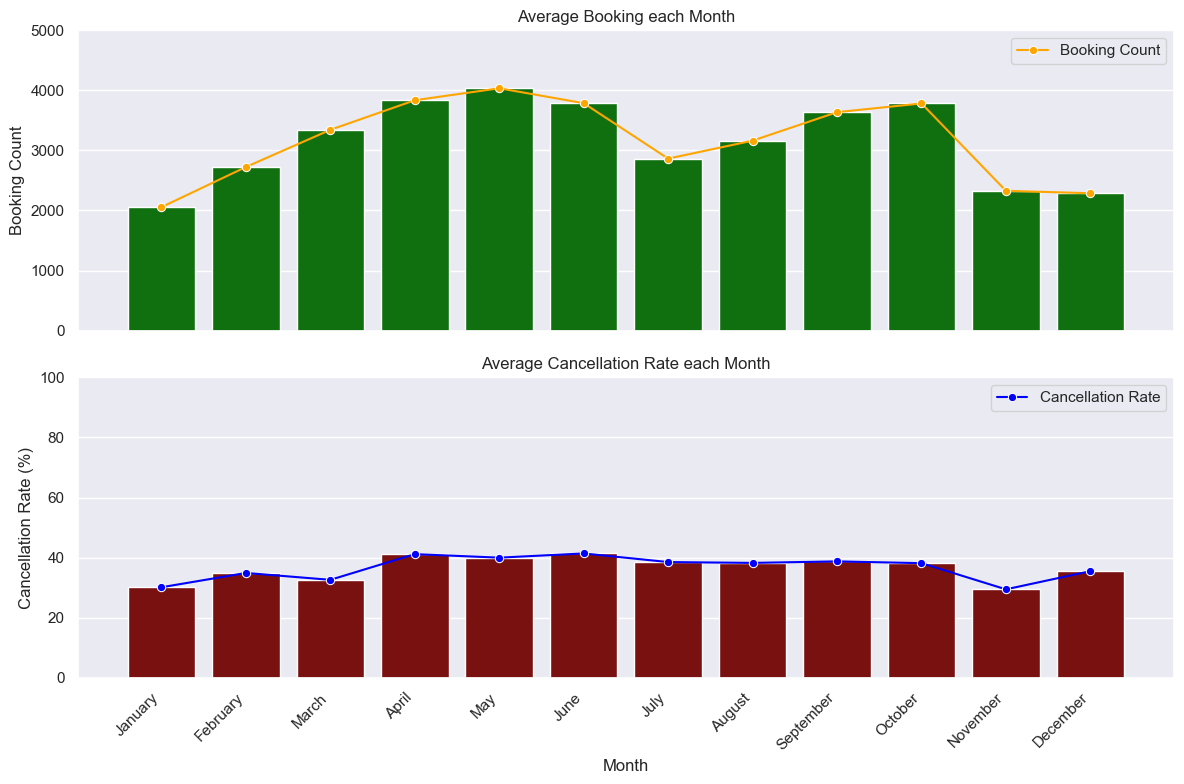

In [35]:
sns.set_theme(style="darkgrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot total bookings in the first subplot (bar plot + line plot)
sns.barplot(x='arrival_date_month', y='total_booking', data=montly_seasonality, color='green', ax=ax1)
sns.lineplot(x='arrival_date_month', y='total_booking', data=montly_seasonality, marker='o', color='orange', label='Booking Count', ax=ax1)

ax1.set_ylabel('Booking Count')
ax1.set_title('Average Booking each Month')
ax1.legend()
ax1.set_ylim(0, 5000)

# Plot cancellation rate in the second subplot (bar plot + line plot)
sns.barplot(x='arrival_date_month', y='cancellation_rate', data=montly_seasonality, color='darkred', ax=ax2)
sns.lineplot(x='arrival_date_month', y='cancellation_rate', data=montly_seasonality, marker='o', color='blue', label='Cancellation Rate', ax=ax2)

ax2.set_xlabel('Month')
ax2.set_ylabel('Cancellation Rate (%)')
ax2.set_title('Average Cancellation Rate each Month')
ax2.legend()
ax2.set_ylim(0, 100)  # Set y-axis limit for cancellation rate

# Adjust layout to prevent overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plots
plt.show()

In [36]:
weekly_count = hotel_df.groupby(['arrival_date_week_number', 'arrival_date_year', 'is_canceled']).size().unstack(fill_value=0).reset_index()
weekly_count.columns = ['arrival_date_week_number', 'arrival_date_year', 'not_canceled', 'canceled']

# Additional calculations
weekly_count['total_booking'] = weekly_count['not_canceled'] + weekly_count['canceled']
weekly_count['cancellation_rate'] = (weekly_count['canceled'] / weekly_count['total_booking']) * 100

# Group by 'arrival_date_month' and calculate the mean for each component
weekly_seasonality = weekly_count.groupby('arrival_date_week_number')[['not_canceled', 'canceled', 'total_booking', 'cancellation_rate']].mean().reset_index()

# Convert 'arrival_date_week_number' to numeric
weekly_seasonality['arrival_date_week_number'] = pd.to_numeric(weekly_seasonality['arrival_date_week_number'], errors='coerce')
weekly_seasonality = weekly_seasonality.sort_values('arrival_date_week_number').reset_index(drop=True).round(2)

weekly_seasonality

arrival_date_week_number  not_canceled  canceled  total_booking  \
0                          1        237.00    132.50         369.50   
1                          2        281.50    135.00         416.50   
2                          3        343.00    128.50         471.50   
3                          4        336.50    174.00         510.50   
4                          5        323.00    149.50         472.50   
5                          6        374.50    131.50         506.00   
6                          7        483.50    240.50         724.00   
7                          8        488.50    280.00         768.50   
8                          9        423.50    245.50         669.00   
9                         10        478.50    258.50         737.00   
10                        11        505.50    219.00         724.50   
11                        12        490.00    223.00         713.00   
12                        13        507.50    301.00         808.50   
13                        14        486.50    293.00         779.50   
14                        15        559.00    356.50         915.50   
15                        16        479.50    345.00         824.50   
16                        17        571.50    415.00         986.50   
17                        18        566.50    450.50        1017.00   
18                        19        522.50    307.00         829.50   
19                        20        535.00    426.00         961.00   
20                        21        601.50    362.00         963.50   
21                        22        518.00    352.00         870.00   
22                        23        538.00    378.50         916.50   
23                        24        512.50    350.00         862.50   
24                        25        499.00    430.50         929.50   
25                        26        528.50    294.50         823.00   
26                        27        380.67    220.00         600.67   
27                        28        411.33    242.67         654.00   
28                        29        400.00    228.67         628.67   
29                        30        414.00    283.33         697.33   
30                        31        395.33    224.33         619.67   
31                        32        416.67    268.00         684.67   
32                        33        471.00    338.33         809.33   
33                        34        453.00    243.00         696.00   
34                        35        378.33    213.33         591.67   
35                        36        465.00    273.00         738.00   
36                        37        466.50    298.50         765.00   
37                        38        582.50    370.00         952.50   
38                        39        562.00    333.50         895.50   
39                        40        477.50    340.50         818.00   
40                        41        551.00    377.50         928.50   
41                        42        559.00    366.00         925.00   
42                        43        477.50    312.50         790.00   
43                        44        514.50    250.50         765.00   
44                        45        406.50    268.50         675.00   
45                        46        326.50    207.00         533.50   
46                        47        450.00    129.00         579.00   
47                        48        383.00    131.00         514.00   
48                        49        378.50    231.00         609.50   
49                        50        287.00    198.50         485.50   
50                        51        223.00     82.50         305.50   
51                        52        283.00    127.00         410.00   
52                        53        407.00    223.00         630.00   

    cancellation_rate  
0               36.04  
1               28.80  
2               25.17  
3               32.66  
4               31.31  
5               25.70  
6

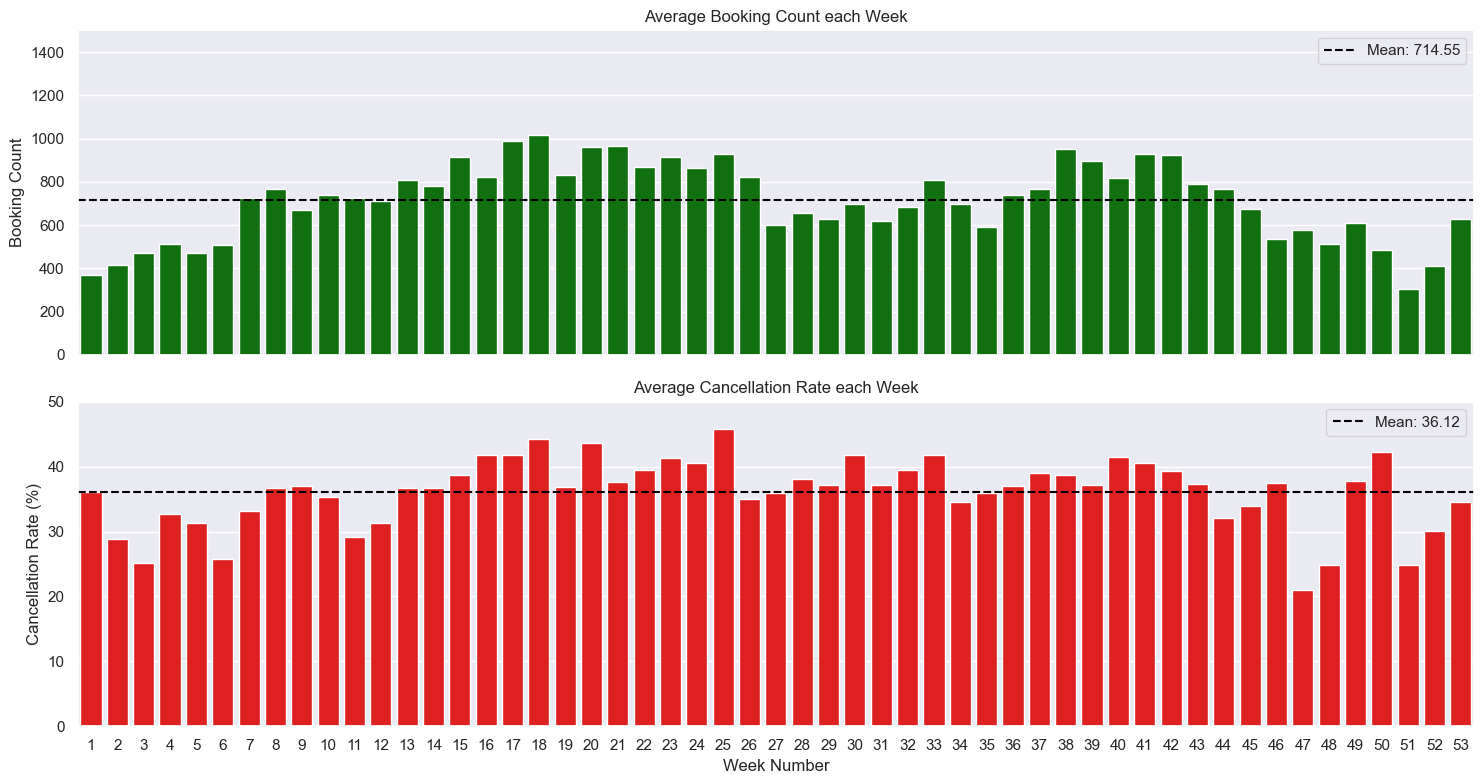

In [37]:
sns.set_theme(style="darkgrid")

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# Plot the total booking data on the first axis
sns.barplot(
    x='arrival_date_week_number', 
    y='total_booking', 
    data=weekly_seasonality, 
    color='green', 
    ax=ax1)

# Add a dashed line for the mean of total_booking
mean_total_booking = weekly_seasonality['total_booking'].mean()
ax1.axhline(mean_total_booking, linestyle='--', color='black', label=f'Mean: {mean_total_booking:.2f}')
ax1.legend()

ax1.set_ylabel("Booking Count")
ax1.set_title("Average Booking Count each Week")
ax1.set_ylim(0, 1500)

# Plot the cancellation rate data on the second axis
sns.barplot(
    x='arrival_date_week_number', 
    y='cancellation_rate', 
    data=weekly_seasonality, 
    color='red', 
    ax=ax2)

# Add a dashed line for the mean of cancellation_rate
mean_cancellation_rate = weekly_seasonality['cancellation_rate'].mean()
ax2.axhline(mean_cancellation_rate, linestyle='--', color='black', label=f'Mean: {mean_cancellation_rate:.2f}')
ax2.legend()

ax2.set_xlabel("Week Number")
ax2.set_ylabel("Cancellation Rate (%)")
ax2.set_title('Average Cancellation Rate each Week')
ax2.set_ylim(0, 50)

# Tight layout and show the plot
plt.tight_layout()
plt.show()

## C.3 Deep-dive Questions

### C.3.1 Demographics

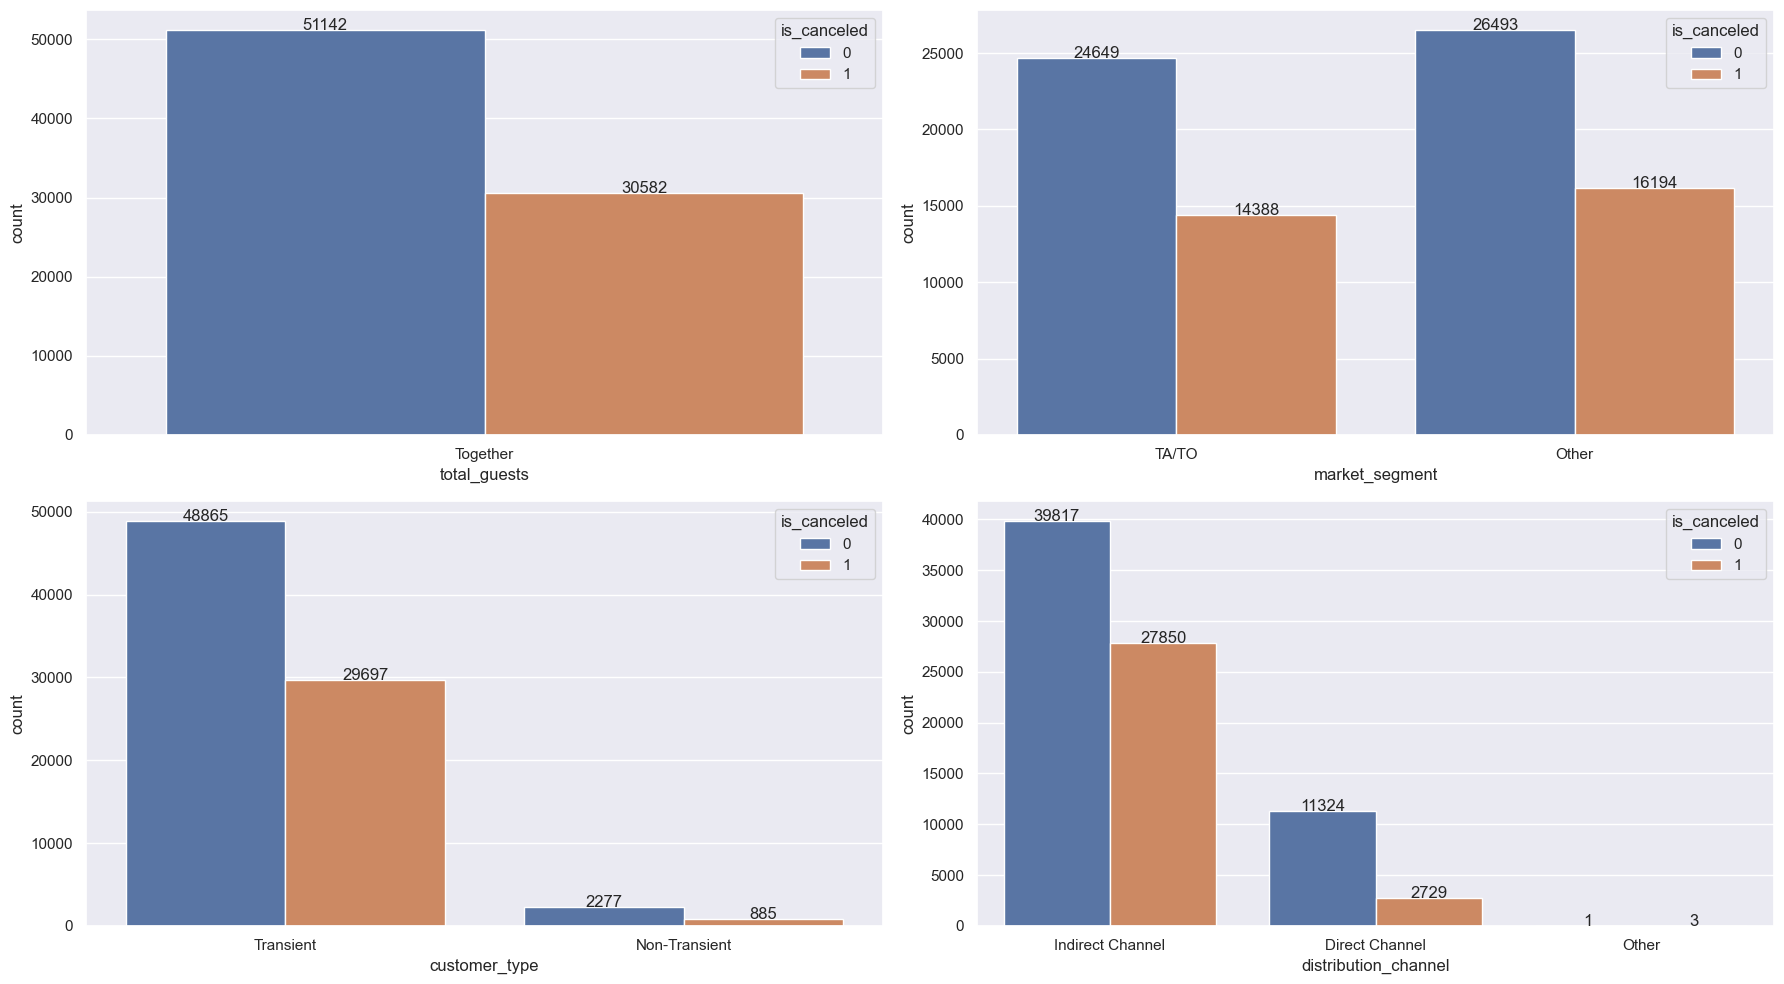

In [38]:
hotel_df2['total_guests'] = hotel_df2['adults'] + hotel_df2['children'] + hotel_df2['babies']

hotel_df2['total_guests'] = hotel_df2['total_guests'].apply(lambda x: 'Lone' if x in ['1'] else 'Together')
hotel_df2['market_segment'] = hotel_df2['market_segment'].apply(lambda x: 'TA/TO' if x in ['Online TA','Offline TA/TO '] else 'Other')
hotel_df2['customer_type'] = hotel_df2['customer_type'].apply(lambda x: 'Transient' if x in ['Transient','Transient-Party'] else 'Non-Transient')
hotel_df2['distribution_channel'] = hotel_df2['distribution_channel'].apply(lambda x: 'Indirect Channel' if x in ['TA/TO', 'GDS'] else ('Direct Channel' if x in ['Direct', 'Corporate'] else 'Other'))

demographics_cat = ['total_guests', 'market_segment', 'customer_type', 'distribution_channel']

plt.figure(figsize=(18, 10))

for i in np.arange(1, len(demographics_cat)+1):
    plt.subplot(2, len(demographics_cat)//2, i)
    ax = sns.countplot(x=demographics_cat[i-1], hue='is_canceled', data=hotel_df2)
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                        (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                        ha='center')  # Center the label horizontall    
    plt.xlabel(demographics_cat[i-1])
    plt.tight_layout()

plt.show()

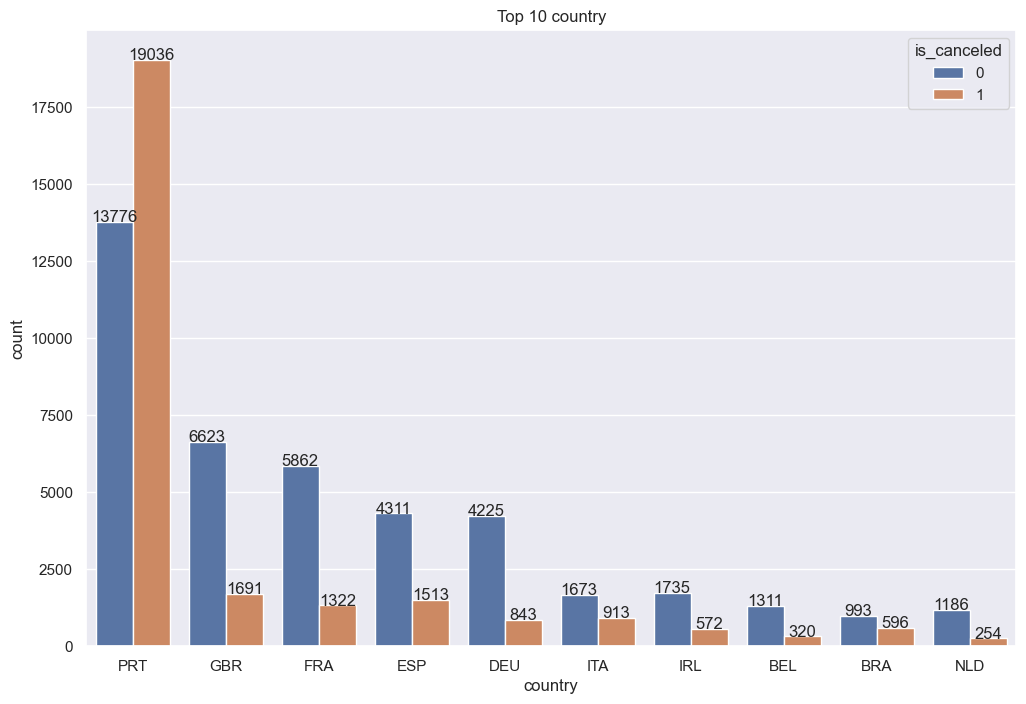

In [39]:
country_counts = hotel_df2['country'].value_counts()

# Pilih 10 kategori 'agent' teratas
top_country = country_counts.nlargest(10).index

# Filter dataframe untuk hanya mencakup kategori teratas dan urutkan berdasarkan frekuensi
df_top_country = hotel_df2[hotel_df2['country'].isin(top_country)]
df_top_country = df_top_country.sort_values(by='country')

# Bar plot untuk 'agent' teratas dengan hue 'is_canceled'
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='country', hue='is_canceled', data=df_top_country, order=top_country)
# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                     (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                     ha='center')  # Center the label horizontall
plt.title('Top 10 country')
plt.show()

In [40]:
import geopandas as gpd
import plotly.express as px

# Hitung jumlah pengamatan untuk setiap negara
count_by_country = hotel_df['country'].value_counts().reset_index()
count_by_country.columns = ['country', 'count']

# Baca data negara dari Natural Earth (dalam contoh ini menggunakan data 110m)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Gabungkan data jumlah pengamatan dengan data negara-negara
merged = world.merge(count_by_country, left_on='iso_a3', right_on='country', how='left')

# Tampilkan peta interaktif dengan Plotly
fig = px.choropleth(merged, 
                    geojson=merged.geometry, 
                    locations=merged.index, 
                    color='count',
                    hover_name='name',
                    projection='natural earth',
                    title='Choropleth Map of Observation Counts by Country')

# Menyesuaikan tata letak peta
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Menampilkan peta
fig.show()

In [41]:
import folium
from folium import Choropleth, Circle

# Hitung jumlah pengamatan untuk setiap negara
count_by_country = hotel_df['country'].value_counts().reset_index()
count_by_country.columns = ['country', 'count']

# Baca data negara dari Natural Earth (dalam contoh ini menggunakan data 110m)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Gabungkan data jumlah pengamatan dengan data negara-negara
merged = world.merge(count_by_country, left_on='iso_a3', right_on='country', how='left')

# Buat peta folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Tambahkan Choropleth Layer
Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=['iso_a3', 'count'],
    key_on='feature.properties.iso_a3',
    fill_color='YlGnBu',
    fill_opacity=1,
    line_opacity=0.5,
    legend_name='Observation Counts'
).add_to(m)

# Tampilkan peta
m

### C.3.2 Historical Information

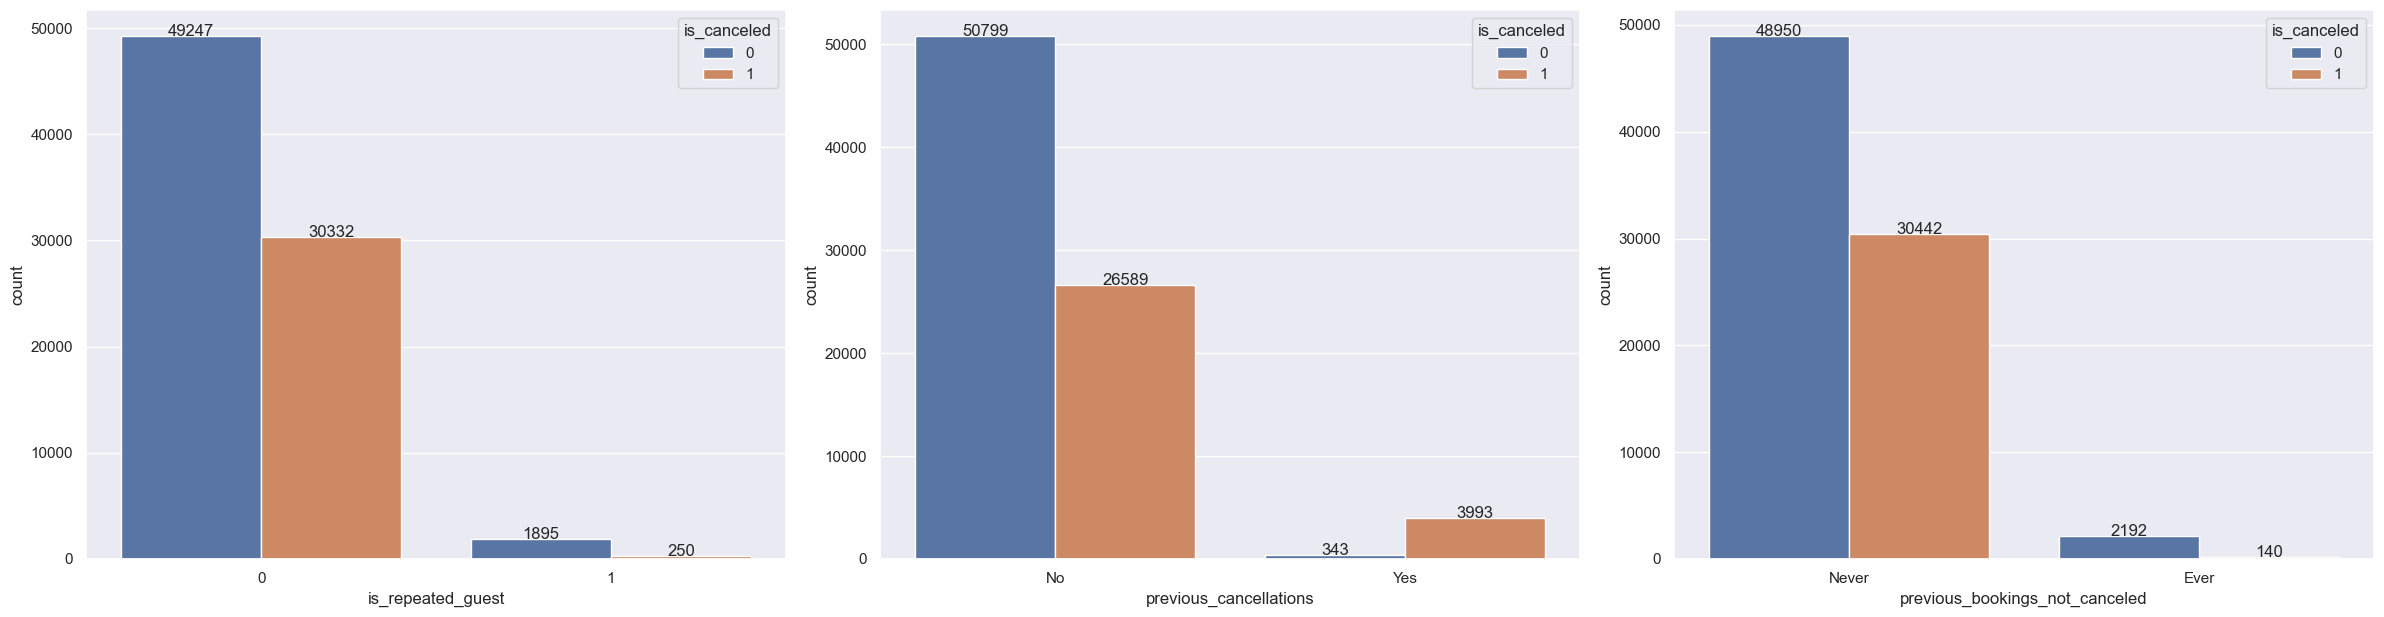

In [42]:
hotel_df2['previous_cancellations'] = hotel_df2['previous_cancellations'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df2['previous_bookings_not_canceled'] = hotel_df2['previous_bookings_not_canceled'].apply(lambda x: 'Never' if x == 0 else 'Ever')

# Historical columns to be plotted
historical = ['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']

# Plotting
plt.figure(figsize=(24, 12))

for i in np.arange(1, len(historical) + 1):
    plt.subplot(2, len(historical) // 1, i)
    ax = sns.countplot(x=historical[i - 1], hue='is_canceled', data=hotel_df2)
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                        (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                        ha='center')  # Center the label horizontall    
    plt.xlabel(historical[i - 1])
    plt.tight_layout()

plt.show()

### C.3.3 Meal and Room Type Information

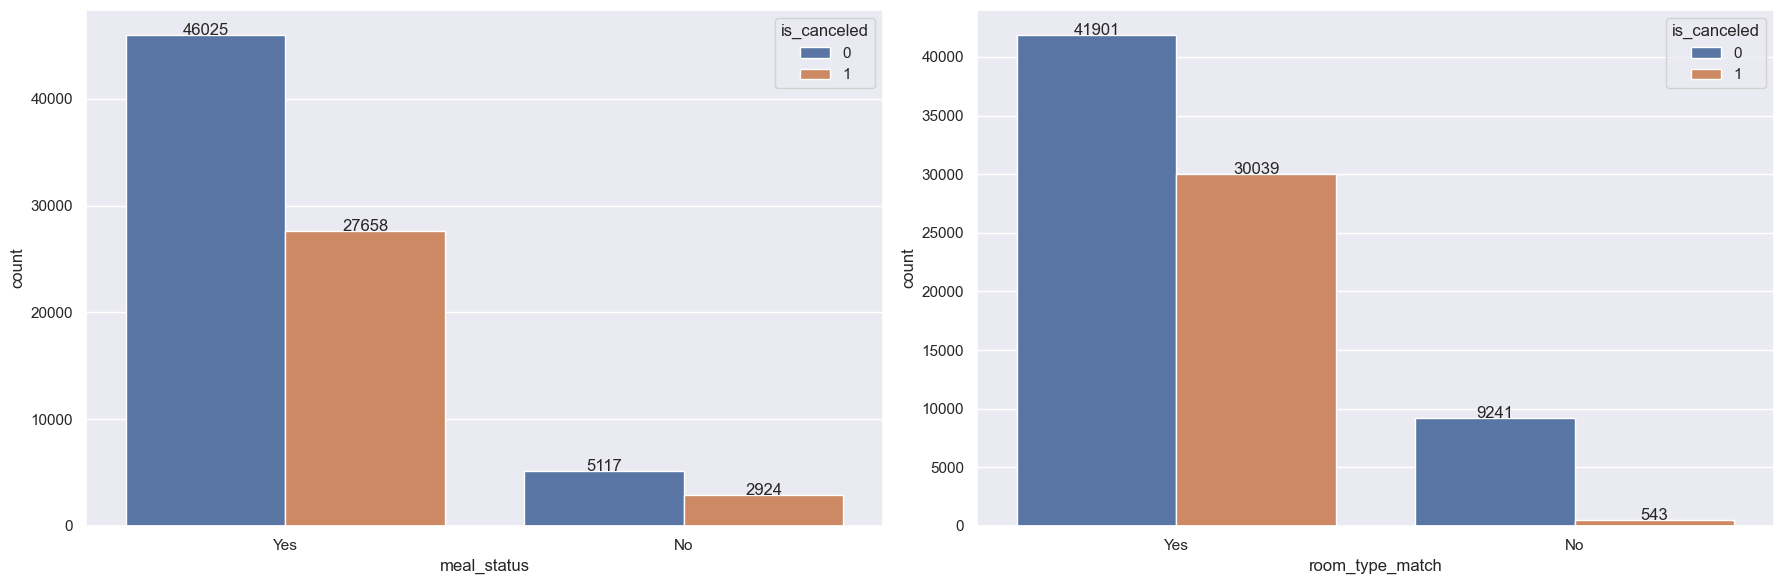

In [43]:
#Room Type Match
hotel_df2['room_type_match'] = hotel_df2['reserved_room_type'] == hotel_df2['assigned_room_type']
hotel_df2['room_type_match'] = hotel_df2['room_type_match'].map({True: 'Yes', False: 'No'})

#Meal Status
hotel_df2['meal_status'] = hotel_df2['meal'].apply(lambda x: 'No' if x in ['SC', 'Undefined'] else 'Yes')

#Categories for meal status and room type match
meal_status_and_room_match = ['meal_status','room_type_match']

plt.figure(figsize=(18, 6))

for i in np.arange(1, len(meal_status_and_room_match)+1):
    plt.subplot(1, len(meal_status_and_room_match)//1, i)
    ax = sns.countplot(x=meal_status_and_room_match[i-1], hue='is_canceled', data=hotel_df2)
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                        (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                        ha='center')  # Center the label horizontall
    plt.xlabel(meal_status_and_room_match[i-1])
    plt.tight_layout()

plt.show()

### C.3.4 Booking Process Information

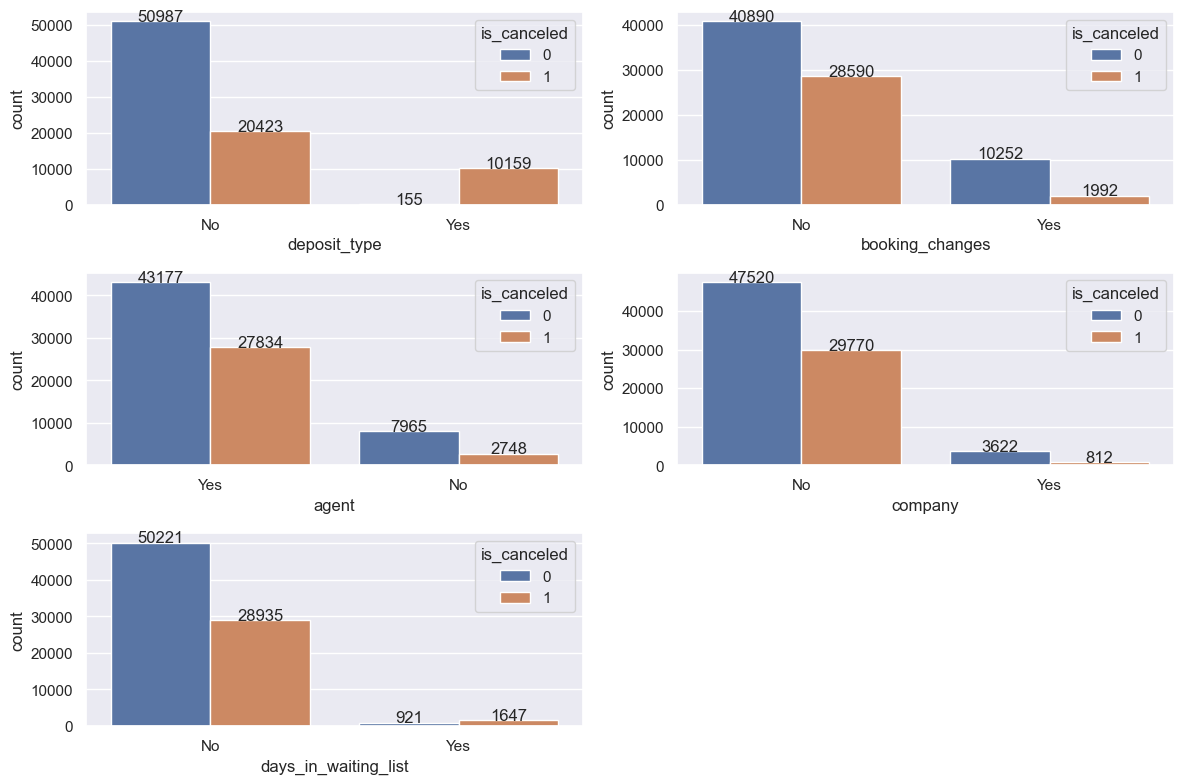

In [44]:
hotel_df2['deposit_type'] = hotel_df2['deposit_type'].apply(lambda x: 'Yes' if x in ['Non Refund', 'Refundable'] else 'No')
hotel_df2['booking_changes'] = hotel_df2['booking_changes'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df2['agent'] = hotel_df2['agent'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df2['company'] = hotel_df2['company'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df2['days_in_waiting_list'] = hotel_df2['days_in_waiting_list'].apply(lambda x: 'No' if x == 0 else 'Yes')

booking_process_cat = ['deposit_type','booking_changes','agent','company','days_in_waiting_list']

plt.figure(figsize=(12, 8))

for i in np.arange(1, len(booking_process_cat)+1):
    plt.subplot(3, len(booking_process_cat)//2, i)
    ax = sns.countplot(x=booking_process_cat[i-1], hue='is_canceled', data=hotel_df2)
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                        (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                        ha='center')  # Center the label horizontall
    plt.xlabel(booking_process_cat[i-1])
    plt.tight_layout()

plt.show()


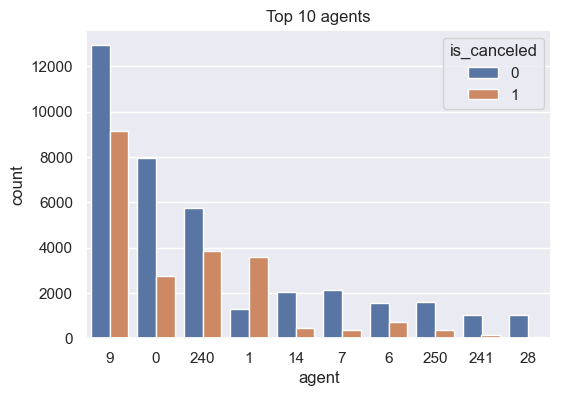

In [45]:
agent_counts = hotel_df['agent'].value_counts()

# Pilih 10 kategori 'agent' teratas
top_agents = agent_counts.nlargest(10).index

# Filter dataframe untuk hanya mencakup kategori teratas dan urutkan berdasarkan frekuensi
df_top_agents = hotel_df[hotel_df['agent'].isin(top_agents)]
df_top_agents = df_top_agents.sort_values(by='agent')

# Bar plot untuk 'agent' teratas dengan hue 'is_canceled'
plt.figure(figsize=(6, 4))
sns.countplot(x='agent', hue='is_canceled', data=df_top_agents, order=top_agents)
plt.title('Top 10 agents')
plt.show()

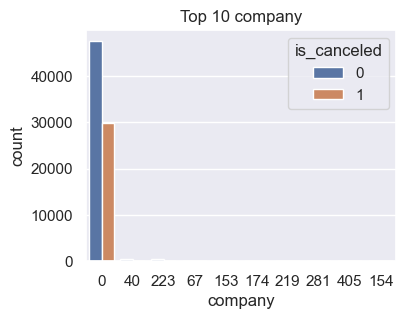

In [46]:
company_counts = hotel_df['company'].value_counts()

# Pilih 10 kategori 'agent' teratas
top_company = company_counts.nlargest(10).index

# Filter dataframe untuk hanya mencakup kategori teratas dan urutkan berdasarkan frekuensi
df_top_company = hotel_df[hotel_df['company'].isin(top_company)]
df_top_company = df_top_company.sort_values(by='company')

# Bar plot untuk 'agent' teratas dengan hue 'is_canceled'
plt.figure(figsize=(4, 3))
sns.countplot(x='company', hue='is_canceled', data=df_top_company, order=top_company)
plt.title('Top 10 company')
plt.show()

### C.3.5 Special Requests Information

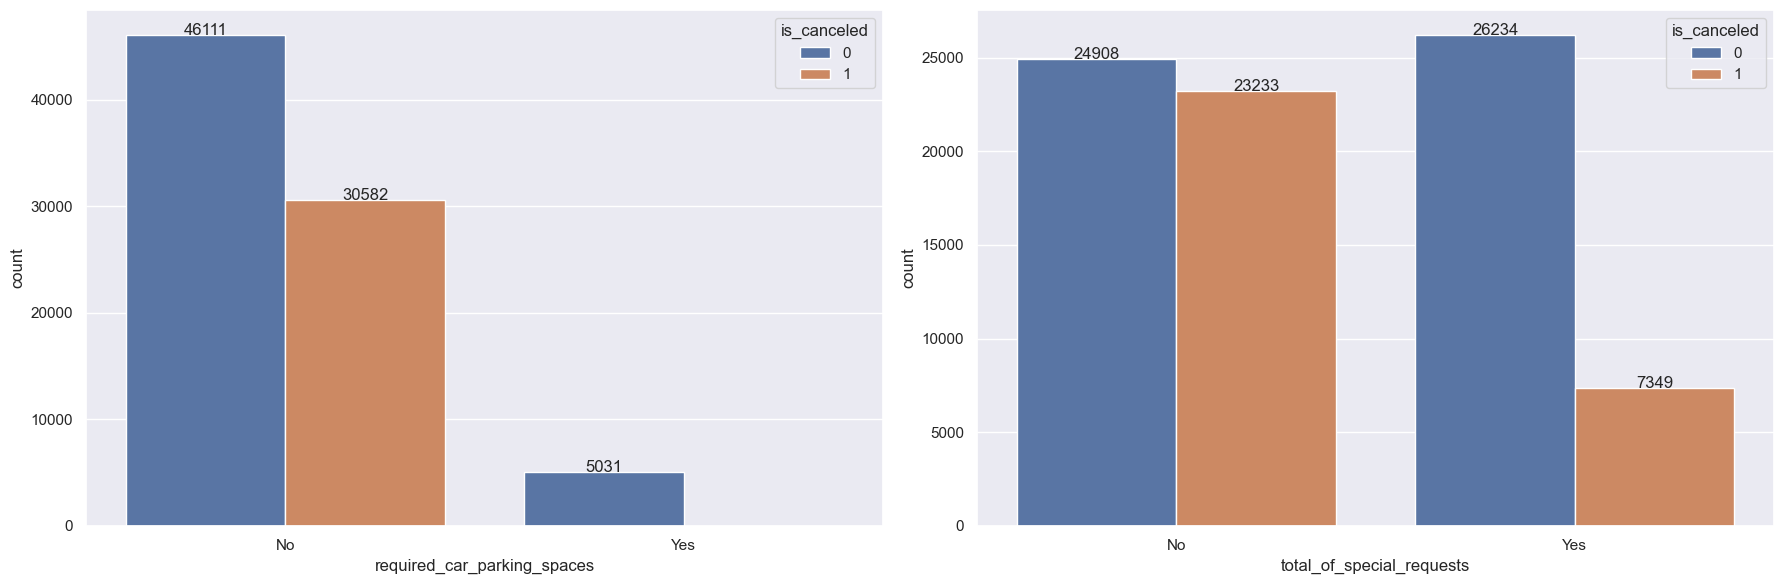

In [47]:
hotel_df2['required_car_parking_spaces'] = hotel_df2['required_car_parking_spaces'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df2['total_of_special_requests'] = hotel_df2['total_of_special_requests'].apply(lambda x: 'No' if x == 0 else 'Yes')

special_requests_cat = ['required_car_parking_spaces','total_of_special_requests']

plt.figure(figsize=(18, 6))

for i in np.arange(1, len(special_requests_cat)+1):
    plt.subplot(1, len(special_requests_cat)//1, i)
    ax = sns.countplot(x=special_requests_cat[i-1], hue='is_canceled', data=hotel_df2)
    # Add count labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                        (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                        ha='center')  # Center the label horizontall
    plt.xlabel(special_requests_cat[i-1])
    plt.tight_layout()

plt.show()

### C.3.6 Duration of Stay Information

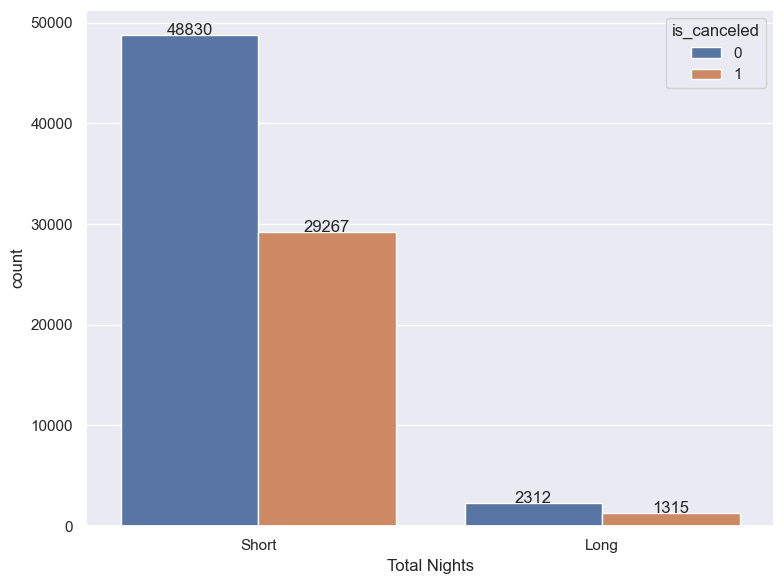

In [48]:
# Calculate 'total_nights' and categorize
hotel_df2['total_nights'] = hotel_df2['stays_in_week_nights'] + hotel_df2['stays_in_weekend_nights']
hotel_df2['total_nights'] = hotel_df2['total_nights'].apply(lambda x: 'Short' if 1 <= x <= 7
                                                            else 'Long')

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='total_nights', hue='is_canceled', data=hotel_df2)
# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                     (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                     ha='center')  # Center the label horizontall
plt.xlabel('Total Nights')
plt.tight_layout()

plt.show()

### C.3.7 Lead Time

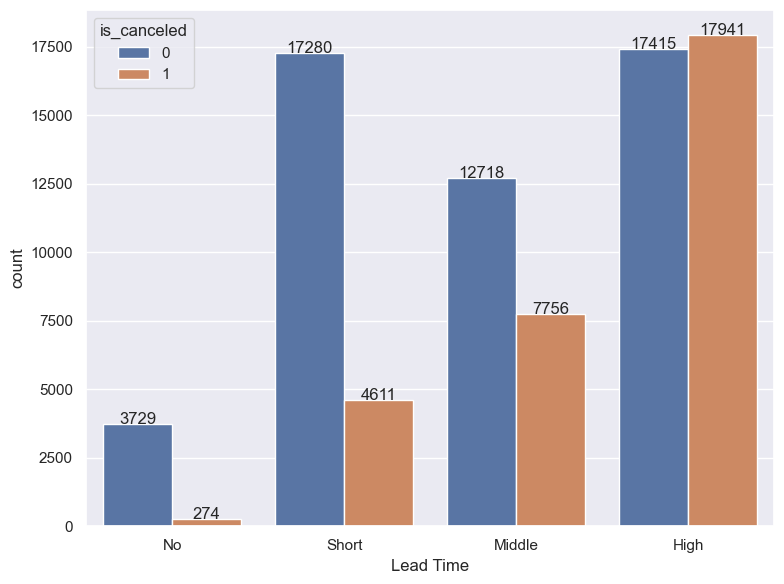

In [49]:
category_order = ['No', 'Short', 'Middle', 'High']
hotel_df2['lead_time'] = pd.Categorical(hotel_df2['lead_time'].apply(lambda x:'No' if x == 0 
                                                      else 'Short' if 0 < x <= 30
                                                      else 'Middle' if 30 < x <= 90
                                                      else 'High'), categories=category_order, ordered=True)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='lead_time', hue='is_canceled', data=hotel_df2)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                     (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                     ha='center')  # Center the label horizontall
plt.xlabel('Lead Time')
plt.tight_layout()

plt.show()

### C.3.8 ADR

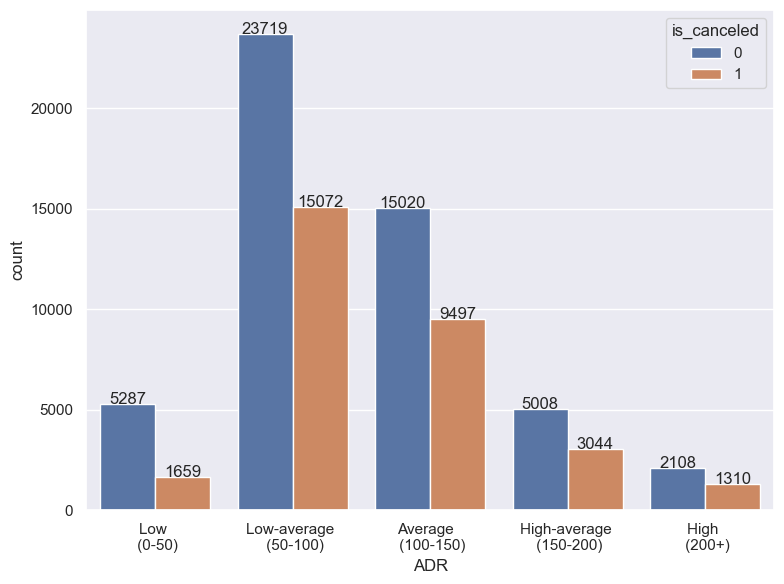

In [50]:
hotel_df2['adr'] = hotel_df2['adr'].apply(lambda x: 'Low \n (0-50)' if 0 <= x <= 50
                                          else 'Low-average \n (50-100)' if 50 < x <= 100
                                          else 'Average  \n (100-150)' if 100 < x <= 150
                                          else 'High-average \n (150-200)' if 150 < x <= 200
                                          else 'High \n (200+)')

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='adr', hue='is_canceled', data=hotel_df2)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{int(height)}",  # Get the height of the bar with two decimal places
                     (p.get_x() + p.get_width()/2, height+1),  # Center the label horizontally
                     ha='center')  # Center the label horizontall
plt.xlabel('ADR')
plt.tight_layout()

plt.show()

# D. Data Preprocessing

In [51]:
hotel_df.head()

hotel  is_canceled  lead_time  \
0                    Crystal Cove, Barbados Barbados            0          8   
1                Greensboro Courtyard Greensboro, NC            1        524   
2   The Westin Peachtree Plaza, Atlanta Atlanta, GA             1        175   
3  Courtyard by Marriott Aberdeen Airport Aberdee...            0          0   
4             W New York – Union Square New York, NY            1         33   

   arrival_date_year arrival_date_month  arrival_date_week_number  \
0               2019            January                         2   
1               2018           December                        51   
2               2019                May                        20   
3               2018            October                        43   
4               2017          September                        39   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                         10                        0                     4   
1                         15                        0                     2   
2                         19                        1                     2   
3                         17                        1                     0   
4                         26                        2                     3   

   adults  ...  agent  company days_in_waiting_list customer_type     adr  \
0       2  ...    314        0                    0     Transient   38.40   
1       2  ...      1        0                    0     Transient   62.80   
2       2  ...     12        0                    0     Transient  110.00   
3       1  ...      0      200                    0     Transient   45.00   
4       2  ...     16        0                    0     Transient   57.92   

  required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                           0                          0           Check-Out   
1                           0                          0            Canceled   
2                           0                          0            Canceled   
3                           0                          0           Check-Out   
4                           0                          1            Canceled   

   reservation_status_date bookingID  
0               2019-01-14         1  
1               2017-10-21         2  
2               2018-11-25         3  
3               2018-10-18         4  
4               2017-08-24         5  

[5 rows x 33 columns]

In [52]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81724 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81724 non-null  object 
 1   is_canceled                     81724 non-null  int64  
 2   lead_time                       81724 non-null  int64  
 3   arrival_date_year               81724 non-null  int64  
 4   arrival_date_month              81724 non-null  object 
 5   arrival_date_week_number        81724 non-null  int64  
 6   arrival_date_day_of_month       81724 non-null  int64  
 7   stays_in_weekend_nights         81724 non-null  int64  
 8   stays_in_week_nights            81724 non-null  int64  
 9   adults                          81724 non-null  int64  
 10  children                        81724 non-null  int64  
 11  babies                          81724 non-null  int64  
 12  meal                            81724

In [53]:
hotel_df.is_canceled.value_counts(normalize = True)*100

is_canceled
0    62.578924
1    37.421076
Name: proportion, dtype: float64

## D.1 T-test and Chi-square Tes

In [54]:
from scipy.stats import ttest_ind, chi2_contingency

target_column = 'is_canceled'

# Pisahkan fitur numerikal dan kategorikal
numerical_features = hotel_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = hotel_df.select_dtypes(include=['object']).columns

# Uji t independen untuk fitur numerikal
for num_feature in numerical_features:
    result = ttest_ind(hotel_df[num_feature][hotel_df[target_column] == 0],
                       hotel_df[num_feature][hotel_df[target_column] == 1])
    print(f"\nNumerical Feature: {num_feature}")
    print("Statistik uji t:", result.statistic)
    print("Nilai p:", result.pvalue)
    
    # Menentukan apakah menolak atau menerima hipotesis nol
    alpha = 0.05  # tingkat signifikansi
    if result.pvalue < alpha:
        print("Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.")
    else:
        print("Menerima hipotesis nol: Tidak ada perbedaan yang signifikan antara grup 0 dan 1.")

# Uji chi-square untuk fitur kategorikal
for cat_feature in categorical_features:
    contingency_table = pd.crosstab(hotel_df[cat_feature], hotel_df[target_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nCategorical Feature: {cat_feature}")
    print("Statistik uji Chi-square:", chi2)
    print("Nilai p:", p)
    
    # Menentukan apakah menolak atau menerima hipotesis nol
    alpha = 0.05  # tingkat signifikansi
    if p < alpha:
        print("Menolak hipotesis nol: Ada hubungan yang signifikan antara", cat_feature, "dan", target_column)
    else:
        print("Menerima hipotesis nol: Tidak ada hubungan yang signifikan antara", cat_feature, "dan", target_column)


Numerical Feature: is_canceled
Statistik uji t: -inf
Nilai p: 0.0
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: lead_time
Statistik uji t: -86.03789012887444
Nilai p: 0.0
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: arrival_date_year
Statistik uji t: -5.671827440186015
Nilai p: 1.4175766843550905e-08
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: arrival_date_week_number
Statistik uji t: -1.4256965878925463
Nilai p: 0.153959761388169
Menerima hipotesis nol: Tidak ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: arrival_date_day_of_month
Statistik uji t: 1.560342314517437
Nilai p: 0.11868288112182926
Menerima hipotesis nol: Tidak ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: stays_in_weekend_nights
Statistik uji t: 0.9678988659212557
Nilai p: 0.3330977451654188
Menerima hipotesis nol: Tidak ada per

In [55]:
hotel_df.drop(['bookingID',
               'hotel',
               'arrival_date_week_number',
               'arrival_date_day_of_month',
               'reservation_status_date',
               'arrival_date_year',
               'reservation_status'], axis = 1, inplace = True)

## D.2 Feature Engineering

In [56]:
#Demographics
hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
hotel_df['total_guests'] = hotel_df['total_guests'].apply(lambda x: 'Lone' if x in [1] else 'Together')
#hotel_df['total_guests'] = hotel_df['total_guests'].apply(lambda x: 'few' if x in [1, 2, 3] else 'many')

hotel_df['market_segment'] = hotel_df['market_segment'].apply(lambda x: 'TA/TO' if x in ['Online TA','Offline TA/TO '] else 'Other')
hotel_df['customer_type'] = hotel_df['customer_type'].apply(lambda x: 'Transient' if x in ['Transient','Transient-Party'] else 'Non-Transient')
hotel_df['distribution_channel'] = hotel_df['distribution_channel'].apply(lambda x: 'Indirect' if x in ['TA/TO', 'GDS'] else ('Direct' if x in ['Direct', 'Corporate'] else 'Other'))

#Historical information
hotel_df['previous_cancellations'] = hotel_df['previous_cancellations'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df['previous_bookings_not_canceled'] = hotel_df['previous_bookings_not_canceled'].apply(lambda x: 'Never' if x == 0 else 'Ever')

#Meal and Room Type
hotel_df['meal'] = hotel_df['meal'].apply(lambda x: 'No' if x in ['SC', 'Undefined'] else 'Yes')
hotel_df['room_type_match'] = hotel_df['reserved_room_type'] == hotel_df['assigned_room_type']
hotel_df['room_type_match'] = hotel_df['room_type_match'].map({True: 'Yes', False: 'No'})

#Booking Process
hotel_df['deposit_type'] = hotel_df['deposit_type'].apply(lambda x: 'Yes' if x in ['Non Refund', 'Refundable'] else 'No')
hotel_df['booking_changes'] = hotel_df['booking_changes'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df['agent'] = hotel_df['agent'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df['company'] = hotel_df['company'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df['days_in_waiting_list'] = hotel_df['days_in_waiting_list'].apply(lambda x: 'No' if x == 0 else 'Yes')

#Special Requests Information
hotel_df['required_car_parking_spaces'] = hotel_df['required_car_parking_spaces'].apply(lambda x: 'No' if x == 0 else 'Yes')
hotel_df['total_of_special_requests'] = hotel_df['total_of_special_requests'].apply(lambda x: 'No' if x == 0 else 'Yes')

#Total Nights
hotel_df['total_nights'] = hotel_df['stays_in_week_nights'] + hotel_df['stays_in_weekend_nights']
hotel_df['total_nights'] = hotel_df['total_nights'].apply(lambda x: 'Short' if 1 <= x <= 7
                                                            else 'Long')
#Lead Time
hotel_df['lead_time'] = hotel_df['lead_time'].apply(lambda x:'No' if x == 0 
                                                      else 'Short' if 0 < x <= 30
                                                      else 'Middle' if 30 < x <= 90
                                                      else 'High')

#ADR
hotel_df['adr'] = hotel_df['adr'].apply(lambda x: 'Low' if 0 <= x <= 50
                                          else 'Low-average' if 50 < x <= 100
                                          else 'Average' if 100 < x <= 150
                                          else 'High-average' if 150 < x <= 200
                                          else 'High')

In [57]:
hotel_df.drop(['adults',
               'children',
               'babies',
               'reserved_room_type',
               'assigned_room_type',
               'stays_in_week_nights',
               'stays_in_weekend_nights'], axis = 1, inplace = True)

## D.3 Encoding

In [58]:
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].map({'January':1, 
                                                                     'February': 2, 
                                                                     'March':3, 
                                                                     'April':4, 
                                                                     'May':5, 'June':6, 
                                                                     'July':7,
                                                                     'August':8, 
                                                                     'September':9, 
                                                                     'October':10, 
                                                                     'November':11, 
                                                                     'December':12})

hotel_df['adr'] = hotel_df['adr'].map({'Low':0,'Low-average': 1,'Average':2,'High-average':3,'High':4})

hotel_df['lead_time'] = hotel_df['lead_time'].map({'No':0,'Short': 1,'Middle':2,'High':3})

In [59]:
categoricals = hotel_df.select_dtypes(include = ['object']).columns.tolist()

for col in categoricals :
    print(hotel_df[col].value_counts())
    print(f'unique values: {hotel_df[col].nunique()}','\n')

meal
Yes    73683
No      8041
Name: count, dtype: int64
unique values: 2 

country
PRT    32812
GBR     8314
FRA     7184
ESP     5824
DEU     5068
       ...  
MRT        1
BRB        1
NPL        1
DJI        1
NAM        1
Name: count, Length: 166, dtype: int64
unique values: 166 

market_segment
Other    42687
TA/TO    39037
Name: count, dtype: int64
unique values: 2 

distribution_channel
Indirect    67667
Direct      14053
Other           4
Name: count, dtype: int64
unique values: 3 

previous_cancellations
No     77388
Yes     4336
Name: count, dtype: int64
unique values: 2 

previous_bookings_not_canceled
Never    79392
Ever      2332
Name: count, dtype: int64
unique values: 2 

booking_changes
No     69480
Yes    12244
Name: count, dtype: int64
unique values: 2 

deposit_type
No     71410
Yes    10314
Name: count, dtype: int64
unique values: 2 

agent
Yes    71011
No     10713
Name: count, dtype: int64
unique values: 2 

company
No     77290
Yes     4434
Name: count, dtype: i

In [60]:
numericals = hotel_df.select_dtypes(include=['int64','float64']).columns.tolist()

for col in numericals :
    print(hotel_df[col].value_counts())
    print(f'unique values: {hotel_df[col].nunique()}','\n')

is_canceled
0    51142
1    30582
Name: count, dtype: int64
unique values: 2 

lead_time
3    35356
1    21891
2    20474
0     4003
Name: count, dtype: int64
unique values: 4 

arrival_date_month
8     9490
7     8592
5     8072
4     7673
6     7575
10    7567
9     7276
3     6688
2     5449
11    4656
12    4574
1     4112
Name: count, dtype: int64
unique values: 12 

is_repeated_guest
0    79579
1     2145
Name: count, dtype: int64
unique values: 2 

adr
1    38791
2    24517
3     8052
0     6946
4     3418
Name: count, dtype: int64
unique values: 5 



In [61]:
freq_encoding_features = ['country']

def frequency_encoder(df, features):
    for feature in features:
        df[feature] = df[feature].map(df[feature].value_counts(normalize=True))
    return df

hotel_df = frequency_encoder(hotel_df, freq_encoding_features)

In [62]:
label_encoding_features = [col for col in hotel_df.select_dtypes(include=['object']).columns 
                           if col not in freq_encoding_features]  

def label_encoder(hotel_df, label_encoding_features):
    le = preprocessing.LabelEncoder()
    le.fit(hotel_df[label_encoding_features])
    hotel_df[label_encoding_features] = le.transform(hotel_df[label_encoding_features])
    return hotel_df
                                          
for col in label_encoding_features:
    hotel_df = label_encoder(hotel_df, col)                                          

In [63]:
hotel_df

is_canceled  lead_time  arrival_date_month  meal   country  \
0                0          1                   1     1  0.031643   
1                1          3                  12     1  0.401498   
2                1          3                   5     1  0.401498   
3                0          0                  10     1  0.004062   
4                1          2                   9     1  0.401498   
...            ...        ...                 ...   ...       ...   
83288            0          1                  10     1  0.087906   
83289            0          1                   9     1  0.014708   
83290            0          3                   6     1  0.028229   
83291            0          3                   7     1  0.062014   
83292            0          3                  10     1  0.014708   

       market_segment  distribution_channel  is_repeated_guest  \
0                   1                     1                  0   
1                   0                     1                  0   
2                   0                     1                  0   
3                   0                     0                  0   
4                   0                     1                  0   
...               ...                   ...                ...   
83288               1                     1                  0   
83289               1                     1                  0   
83290               0                     0                  0   
83291               1                     1                  0   
83292               1                     1                  0   

       previous_cancellations  previous_bookings_not_canceled  ...  agent  \
0                           0                               1  ...      1   
1                           0                               1  ...      1   
2                           0                               1  ...      1   
3                           0                               1  ...      0   
4                           0                               1  ...      1   
...                       ...                             ...  ...    ...   
83288                       0                               1  ...      1   
83289                       0                               1  ...      1   
83290                       0                               1  ...      0   
83291                       0                               1  ...      1   
83292                       0                               1  ...      1   

       company  days_in_waiting_list  customer_type  adr  \
0            0                     0              1    0   
1            0                     0              1    1   
2            0                     0              1    2   
3            1                     0              1    0   
4            0                     0              1    1   
...        ...                   ...            ...  ...   
83288        0                     0              1    3   
83289        0                     0              1    1   
83290        0                     0              1    2   
83291        0                     0              1    2   
83292        0                     0              1    1   

       required_car_parking_spaces  total_of_special_requests  total_guests  \
0                                0                          0             1   
1                                0                          0             1   
2                                0                          0             1   
3                                0                          0             0   
4                                0                          1             1   
...                            ...                        ...           ...   
83288                            1                          1             1   
83289                            0                          1             1   
83290                       

In [64]:
numericals = hotel_df.select_dtypes(include=['int64','float64']).columns.tolist()

for col in numericals :
    print(hotel_df[col].value_counts())
    print(f'unique values: {hotel_df[col].nunique()}','\n')

is_canceled
0    51142
1    30582
Name: count, dtype: int64
unique values: 2 

lead_time
3    35356
1    21891
2    20474
0     4003
Name: count, dtype: int64
unique values: 4 

arrival_date_month
8     9490
7     8592
5     8072
4     7673
6     7575
10    7567
9     7276
3     6688
2     5449
11    4656
12    4574
1     4112
Name: count, dtype: int64
unique values: 12 

meal
1    73683
0     8041
Name: count, dtype: int64
unique values: 2 

country
0.401498    32812
0.101733     8314
0.087906     7184
0.071264     5824
0.062014     5068
            ...  
0.000049       20
0.000196       16
0.000171       14
0.000086       14
0.000110        9
Name: count, Length: 77, dtype: int64
unique values: 77 

market_segment
0    42687
1    39037
Name: count, dtype: int64
unique values: 2 

distribution_channel
1    67667
0    14053
2        4
Name: count, dtype: int64
unique values: 3 

is_repeated_guest
0    79579
1     2145
Name: count, dtype: int64
unique values: 2 

previous_cancellations


## D.4 T-test and Chi-square Tes

In [65]:
from scipy.stats import ttest_ind, chi2_contingency

target_column = 'is_canceled'

# Pisahkan fitur numerikal dan kategorikal
numerical_features = hotel_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = hotel_df.select_dtypes(include=['object']).columns

# Uji t independen untuk fitur numerikal
for num_feature in numerical_features:
    result = ttest_ind(hotel_df[num_feature][hotel_df[target_column] == 0],
                       hotel_df[num_feature][hotel_df[target_column] == 1])
    print(f"\nNumerical Feature: {num_feature}")
    print("Statistik uji t:", result.statistic)
    print("Nilai p:", result.pvalue)
    
    # Menentukan apakah menolak atau menerima hipotesis nol
    alpha = 0.05  # tingkat signifikansi
    if result.pvalue < alpha:
        print("Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.")
    else:
        print("Menerima hipotesis nol: Tidak ada perbedaan yang signifikan antara grup 0 dan 1.")

# Uji chi-square untuk fitur kategorikal
for cat_feature in categorical_features:
    contingency_table = pd.crosstab(hotel_df[cat_feature], hotel_df[target_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nCategorical Feature: {cat_feature}")
    print("Statistik uji Chi-square:", chi2)
    print("Nilai p:", p)
    
    # Menentukan apakah menolak atau menerima hipotesis nol
    alpha = 0.05  # tingkat signifikansi
    if p < alpha:
        print("Menolak hipotesis nol: Ada hubungan yang signifikan antara", cat_feature, "dan", target_column)
    else:
        print("Menerima hipotesis nol: Tidak ada hubungan yang signifikan antara", cat_feature, "dan", target_column)


Numerical Feature: is_canceled
Statistik uji t: -inf
Nilai p: 0.0
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: lead_time
Statistik uji t: -85.81917585461917
Nilai p: 0.0
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: arrival_date_month
Statistik uji t: -2.2184832905944813
Nilai p: 0.026524634940415886
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: meal
Statistik uji t: -2.0636475151804134
Nilai p: 0.0390542989386798
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: country
Statistik uji t: -101.72620008818129
Nilai p: 0.0
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: market_segment
Statistik uji t: 3.184856930921355
Nilai p: 0.0014487992616952076
Menolak hipotesis nol: Ada perbedaan yang signifikan antara grup 0 dan 1.

Numerical Feature: distribution_ch

In [66]:
hotel_df.drop(['total_nights'], axis = 1, inplace = True)

In [67]:
hotel_df

is_canceled  lead_time  arrival_date_month  meal   country  \
0                0          1                   1     1  0.031643   
1                1          3                  12     1  0.401498   
2                1          3                   5     1  0.401498   
3                0          0                  10     1  0.004062   
4                1          2                   9     1  0.401498   
...            ...        ...                 ...   ...       ...   
83288            0          1                  10     1  0.087906   
83289            0          1                   9     1  0.014708   
83290            0          3                   6     1  0.028229   
83291            0          3                   7     1  0.062014   
83292            0          3                  10     1  0.014708   

       market_segment  distribution_channel  is_repeated_guest  \
0                   1                     1                  0   
1                   0                     1                  0   
2                   0                     1                  0   
3                   0                     0                  0   
4                   0                     1                  0   
...               ...                   ...                ...   
83288               1                     1                  0   
83289               1                     1                  0   
83290               0                     0                  0   
83291               1                     1                  0   
83292               1                     1                  0   

       previous_cancellations  previous_bookings_not_canceled  ...  \
0                           0                               1  ...   
1                           0                               1  ...   
2                           0                               1  ...   
3                           0                               1  ...   
4                           0                               1  ...   
...                       ...                             ...  ...   
83288                       0                               1  ...   
83289                       0                               1  ...   
83290                       0                               1  ...   
83291                       0                               1  ...   
83292                       0                               1  ...   

       deposit_type  agent  company  days_in_waiting_list  customer_type  adr  \
0                 0      1        0                     0              1    0   
1                 1      1        0                     0              1    1   
2                 1      1        0                     0              1    2   
3                 0      0        1                     0              1    0   
4                 0      1        0                     0              1    1   
...             ...    ...      ...                   ...            ...  ...   
83288             0      1        0                     0              1    3   
83289             0      1        0                     0              1    1   
83290             0      0        0                     0              1    2   
83291             0      1        0                     0              1    2   
83292             0      1        0                     0              1    1   

       required_car_parking_spaces  total_of_special_requests  total_guests  \
0                                0                          0             1   
1                                0                          0             1   
2                                0                          0             1   
3                                0                          0             0   
4                                0                          1             1   
...                            ...                        ...           ...   
83288             

In [68]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81724 entries, 0 to 83292
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     81724 non-null  int64  
 1   lead_time                       81724 non-null  int64  
 2   arrival_date_month              81724 non-null  int64  
 3   meal                            81724 non-null  int64  
 4   country                         81724 non-null  float64
 5   market_segment                  81724 non-null  int64  
 6   distribution_channel            81724 non-null  int64  
 7   is_repeated_guest               81724 non-null  int64  
 8   previous_cancellations          81724 non-null  int64  
 9   previous_bookings_not_canceled  81724 non-null  int64  
 10  booking_changes                 81724 non-null  int64  
 11  deposit_type                    81724 non-null  int64  
 12  agent                           81724

## D.5 Outlier Checking

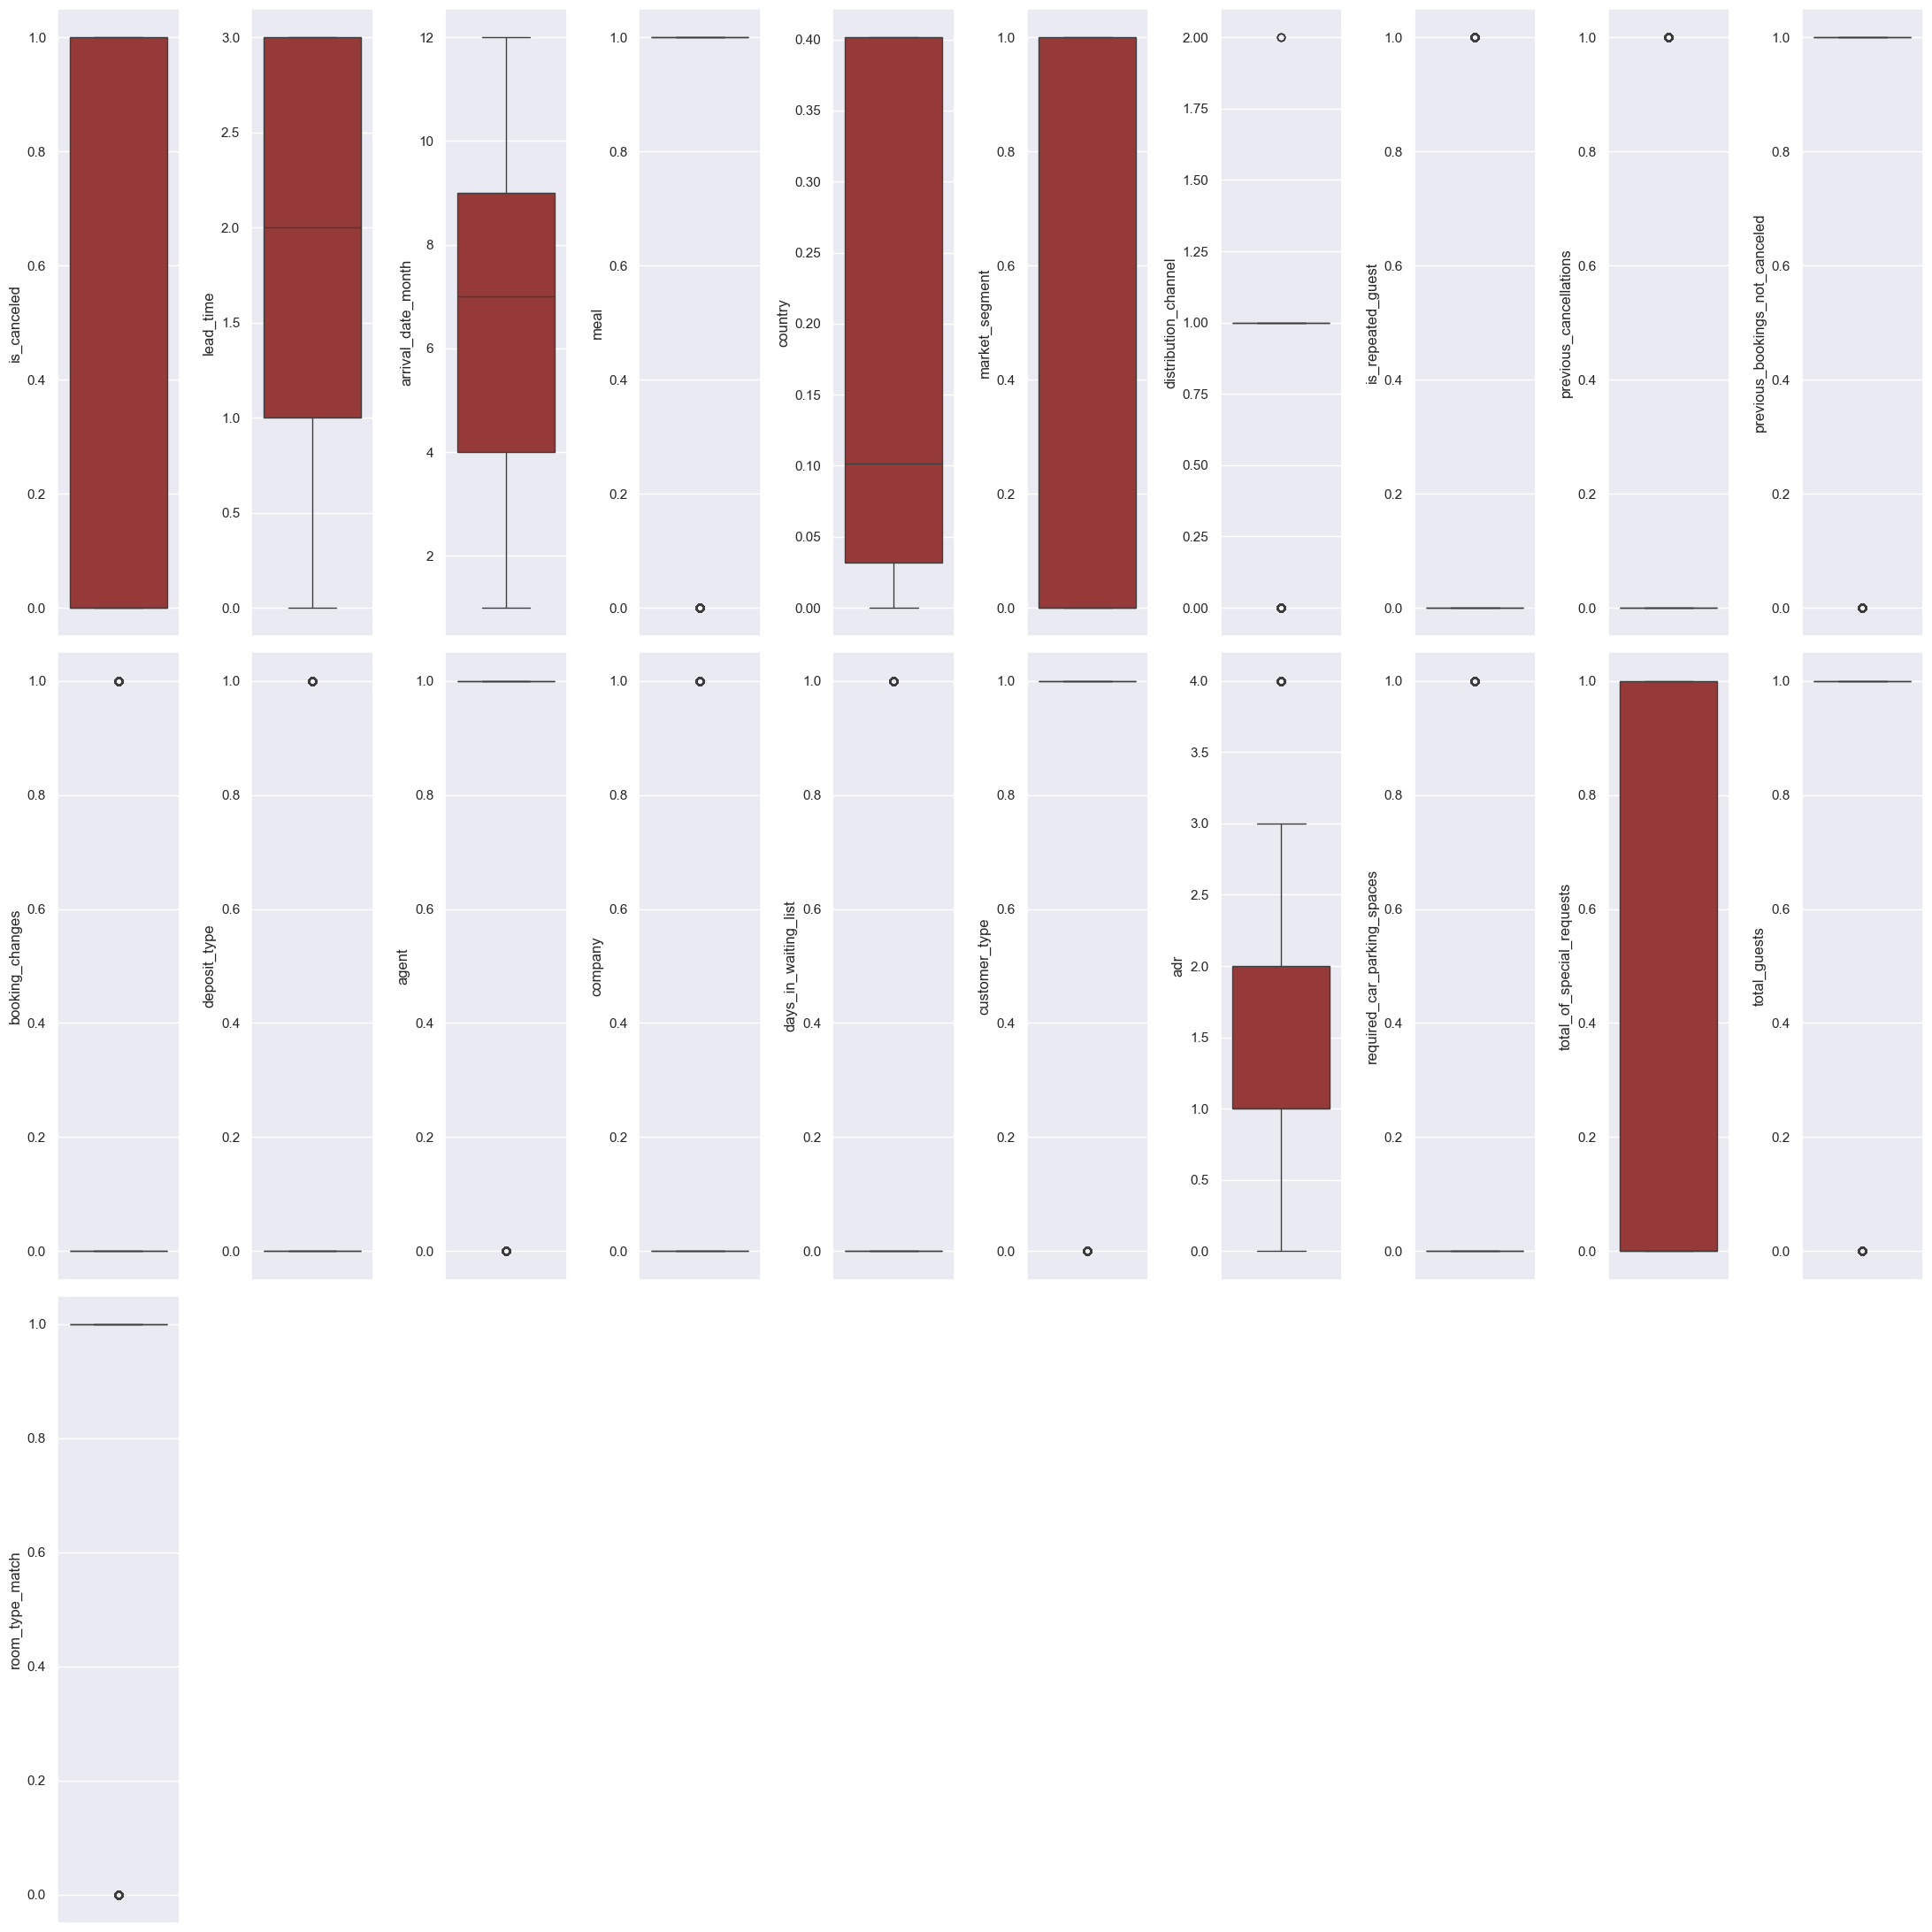

In [69]:
plt.figure(figsize=(22,22))

columns = hotel_df.select_dtypes(include = ['int64','float64']).columns.tolist()

# plotting
for i in range(0, len(columns)):
    plt.subplot(3, len(columns)//2, i+1)
    sns.boxplot(y=hotel_df[columns[i]], color='brown')
    plt.tight_layout()

# E. Modelling

## E.1 Baseline

In [70]:
X = hotel_df.drop(columns = 'is_canceled').to_numpy()
y = hotel_df['is_canceled'].to_numpy()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training
Model: K-NN
              precision    recall  f1-score   support

           0     0.8804    0.9049    0.8925     40963
           1     0.8326    0.7938    0.8127     24416

    accuracy                         0.8634     65379
   macro avg     0.8565    0.8493    0.8526     65379
weighted avg     0.8625    0.8634    0.8627     65379

Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.8199    0.9031    0.8595     40963
           1     0.8041    0.6672    0.7293     24416

    accuracy                         0.8150     65379
   macro avg     0.8120    0.7851    0.7944     65379
weighted avg     0.8140    0.8150    0.8109     65379

Model: Decision Tree
              precision    recall  f1-score   support

           0     0.9098    0.9426    0.9259     40963
           1     0.8975    0.8432    0.8695     24416

    accuracy                         0.9055     65379
   macro avg     0.9036    0.8929    0.8977     65379
weigh

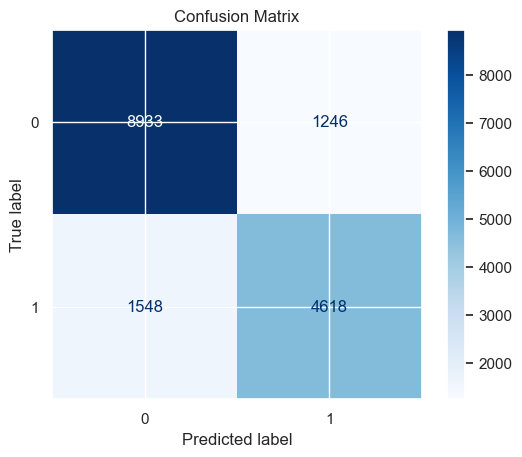

              precision    recall  f1-score   support

           0     0.8523    0.8776    0.8648     10179
           1     0.7875    0.7489    0.7677      6166

    accuracy                         0.8291     16345
   macro avg     0.8199    0.8133    0.8163     16345
weighted avg     0.8279    0.8291    0.8282     16345

Logistic Regression


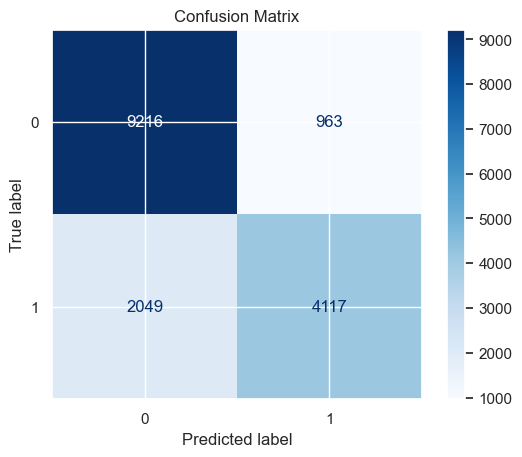

              precision    recall  f1-score   support

           0     0.8181    0.9054    0.8595     10179
           1     0.8104    0.6677    0.7322      6166

    accuracy                         0.8157     16345
   macro avg     0.8143    0.7865    0.7959     16345
weighted avg     0.8152    0.8157    0.8115     16345

Decision Tree


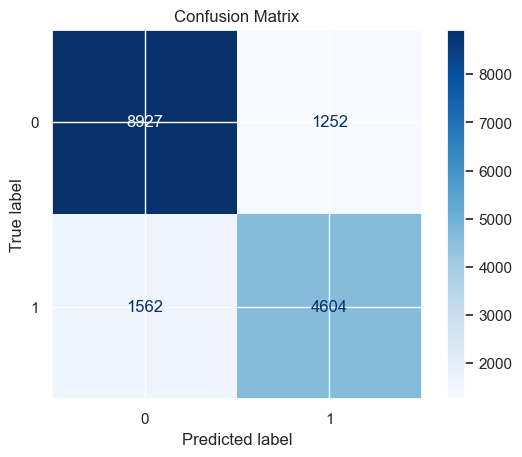

              precision    recall  f1-score   support

           0     0.8511    0.8770    0.8638     10179
           1     0.7862    0.7467    0.7659      6166

    accuracy                         0.8278     16345
   macro avg     0.8186    0.8118    0.8149     16345
weighted avg     0.8266    0.8278    0.8269     16345

Random Forest


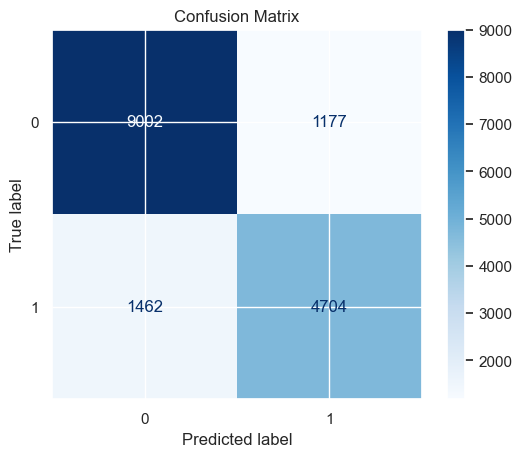

              precision    recall  f1-score   support

           0     0.8603    0.8844    0.8722     10179
           1     0.7999    0.7629    0.7809      6166

    accuracy                         0.8385     16345
   macro avg     0.8301    0.8236    0.8266     16345
weighted avg     0.8375    0.8385    0.8377     16345

Naive Bayes


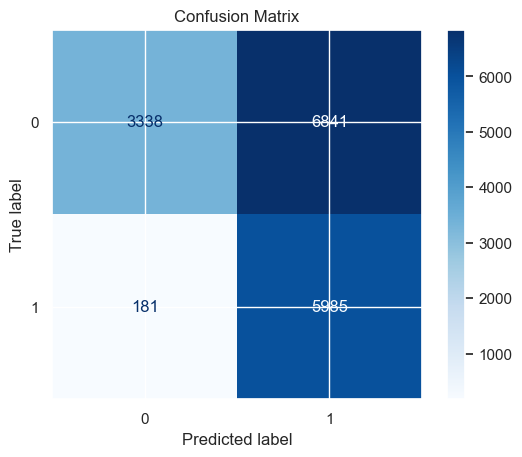

              precision    recall  f1-score   support

           0     0.9486    0.3279    0.4874     10179
           1     0.4666    0.9706    0.6303      6166

    accuracy                         0.5704     16345
   macro avg     0.7076    0.6493    0.5588     16345
weighted avg     0.7668    0.5704    0.5413     16345

AdaBoost


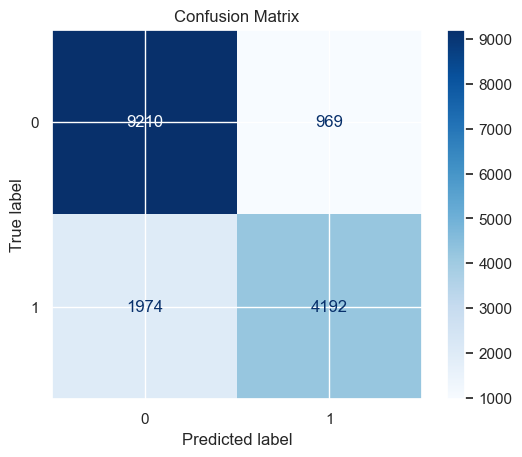

              precision    recall  f1-score   support

           0     0.8235    0.9048    0.8622     10179
           1     0.8122    0.6799    0.7402      6166

    accuracy                         0.8199     16345
   macro avg     0.8179    0.7923    0.8012     16345
weighted avg     0.8193    0.8199    0.8162     16345

XGBoost


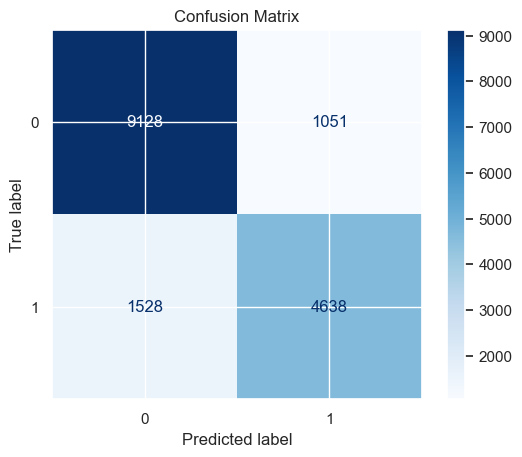

              precision    recall  f1-score   support

           0     0.8566    0.8967    0.8762     10179
           1     0.8153    0.7522    0.7825      6166

    accuracy                         0.8422     16345
   macro avg     0.8359    0.8245    0.8293     16345
weighted avg     0.8410    0.8422    0.8408     16345

CatBoost


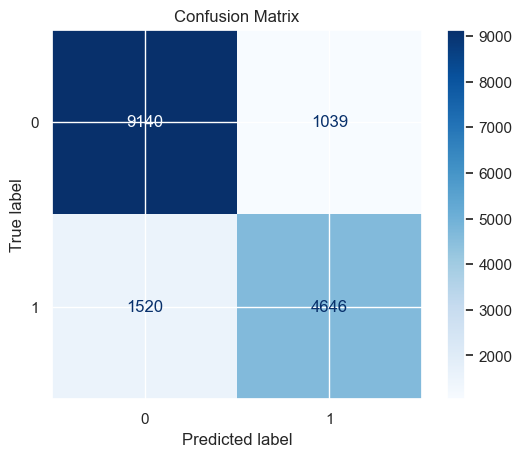

              precision    recall  f1-score   support

           0     0.8574    0.8979    0.8772     10179
           1     0.8172    0.7535    0.7841      6166

    accuracy                         0.8434     16345
   macro avg     0.8373    0.8257    0.8306     16345
weighted avg     0.8423    0.8434    0.8421     16345

LightGBM


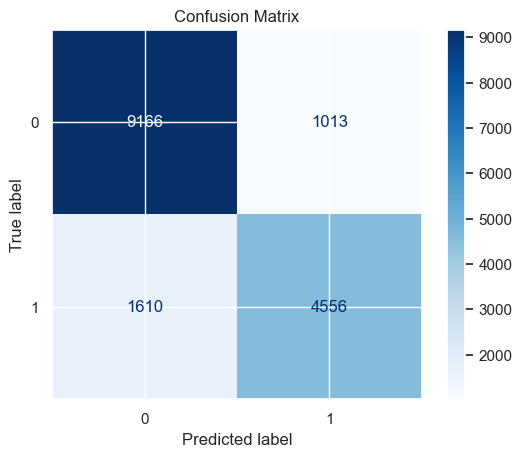

              precision    recall  f1-score   support

           0     0.8506    0.9005    0.8748     10179
           1     0.8181    0.7389    0.7765      6166

    accuracy                         0.8395     16345
   macro avg     0.8343    0.8197    0.8257     16345
weighted avg     0.8383    0.8395    0.8377     16345

Extra Tree


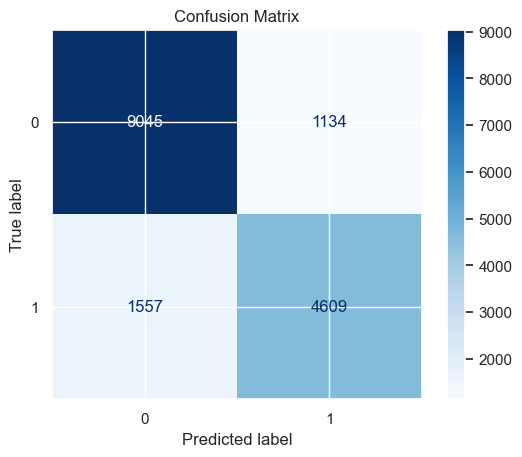

              precision    recall  f1-score   support

           0     0.8531    0.8886    0.8705     10179
           1     0.8025    0.7475    0.7740      6166

    accuracy                         0.8354     16345
   macro avg     0.8278    0.8180    0.8223     16345
weighted avg     0.8341    0.8354    0.8341     16345

CPU times: user 1min 50s, sys: 13.4 s, total: 2min 3s
Wall time: 35.5 s


In [73]:
%%time

models = [
    ('K-NN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state = 42, verbose = 0)),
    ('LightGBM', LGBMClassifier(random_state = 42, verbose =0)),
    ('Extra Tree', ExtraTreesClassifier(random_state = 42)),
]

for model_name, model in models:
    model.fit(X_train_scaled, y_train)

# Evalution for Training
print("="*100)
print('Training') 
print("="*100)
    
for model_name, model in models:
    y_pred_train = model.predict(X_train_scaled)
    print(f'Model: {model_name}')
    print(classification_report(y_train, y_pred_train,digits=4))
    print("="*60)
    
# Evaluation for testing
print("="*100)
print('Testing') 
print("="*100)

for model_name, model in models:
    
    y_pred_test = model.predict(X_test_scaled)
    print(f'{model_name}')
    print("="*60)    

    cm = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)                                  
    disp.plot(cmap='Blues', values_format='d', ax = ax)
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred_test, digits=4))
    print("="*60)

In [74]:
f1_score_results = []

for model_name, model in models:
    y_pred_train = model.predict(X_train_scaled)
    score_train = f1_score(y_train, y_pred_train)*100
    
    y_pred_test = model.predict(X_test_scaled)
    score_test = f1_score(y_test, y_pred_test)*100
    
    y_pred_test = model.predict(X_test_scaled)
    score_fnr_test = 100-(recall_score(y_test, y_pred_test)*100)

    f1_score_results.append({
        'model': model_name,
        'f1_score_BS': score_test,
        'f1_score_BS_training': score_train,
        'difference_f1_score (%)': abs((score_train-score_test)*100/score_train),
        'fnr_score_BS': score_fnr_test
        
    })

f1_score_BS = pd.DataFrame(f1_score_results).sort_values(by='f1_score_BS', ascending=False).reset_index(drop=True)

In [75]:
f1_score_BS

model  f1_score_BS  f1_score_BS_training  \
0             CatBoost    78.406885             79.987241   
1              XGBoost    78.245466             79.615278   
2        Random Forest    78.094131             87.202418   
3             LightGBM    77.648061             78.087274   
4           Extra Tree    77.403644             86.947524   
5                 K-NN    76.774730             81.272277   
6        Decision Tree    76.592913             86.947524   
7             AdaBoost    74.017833             73.432226   
8  Logistic Regression    73.217144             72.926693   
9          Naive Bayes    63.026537             62.649741   

   difference_f1_score (%)  fnr_score_BS  
0                 1.975759     24.651314  
1                 1.720540     24.781057  
2                10.444993     23.710671  
3                 0.562463     26.110931  
4                10.976597     25.251379  
5                 5.533926     25.105417  
6                11.909035     25.332468  
7                 0.797480     32.014272  
8                 0.398278     33.230620  
9                 0.601433      2.935452

## E.2 Cross Validation

In [76]:
X = hotel_df.drop(columns = 'is_canceled').to_numpy()
y = hotel_df['is_canceled'].to_numpy()

In [77]:
stratify = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [78]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [79]:
%%time

from sklearn.model_selection import cross_val_score

models = [
    ('K-NN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state = 42, verbose = 0)),
    ('LightGBM', LGBMClassifier(random_state = 42, verbose = 0)),
    ('Extra Tree', ExtraTreesClassifier(random_state = 42))
]

results = []

for model_name, model in models:
    cv_f1_scores = cross_val_score(model, X_scaled, y, scoring='f1', cv = stratify)*100

    # Print precision scores for each fold
    print(f'{model_name} f1 score for Each Fold: {cv_f1_scores}')

    # Print mean precision score
    mean_f1_score = cv_f1_scores.mean()
    print(f'{model_name} Mean f1 score: {mean_f1_score}\n')

    results.append({
        'model': model_name,
        'f1_score_cv': mean_f1_score
    })

cross_validation = pd.DataFrame(results).sort_values(by='f1_score_cv', ascending=False).reset_index(drop=True)

K-NN f1 score for Each Fold: [76.43784787 76.88963211 76.54155496 75.39320142 75.29212532 75.94466937
 76.48329732 76.00470826 76.39427127 76.62075915]
K-NN Mean f1 score: 76.20020670432129

Logistic Regression f1 score for Each Fold: [73.02209551 73.01700985 73.00734372 72.04030227 72.52629702 72.8615163
 72.79529663 73.24444444 73.3369003  73.65958978]
Logistic Regression Mean f1 score: 72.9510795827534

Decision Tree f1 score for Each Fold: [76.76187257 77.46031746 76.82804674 74.74024868 75.3887762  77.34047898
 76.32061323 76.06490872 76.20164127 77.65221791]
Decision Tree Mean f1 score: 76.47591217685992

Random Forest f1 score for Each Fold: [77.84310432 78.30845771 78.14061979 76.37038286 76.88442211 78.53715042
 78.14722911 77.53866846 77.19766472 78.29145729]
Random Forest Mean f1 score: 77.72591568004043

Naive Bayes f1 score for Each Fold: [62.86076752 62.84083703 62.9774627  62.49867767 62.82622533 62.68941401
 62.49342451 62.15423303 62.8565347  62.89602381]
Naive Bayes M

In [80]:
cross_validation

model  f1_score_cv
0             CatBoost    78.388243
1              XGBoost    78.254739
2        Random Forest    77.725916
3             LightGBM    77.641577
4           Extra Tree    77.149331
5        Decision Tree    76.475912
6                 K-NN    76.200207
7             AdaBoost    73.548206
8  Logistic Regression    72.951080
9          Naive Bayes    62.709360

## E3. Baseline with Cross Validation


In [81]:
X = hotel_df.drop(columns = 'is_canceled').to_numpy()
y = hotel_df['is_canceled'].to_numpy()

In [82]:
stratify = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=42)

In [84]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training
Model: K-NN
              precision    recall  f1-score   support

           0     0.8790    0.9081    0.8933     40913
           1     0.8373    0.7910    0.8135     24466

    accuracy                         0.8643     65379
   macro avg     0.8582    0.8496    0.8534     65379
weighted avg     0.8634    0.8643    0.8635     65379

Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.8203    0.9038    0.8600     40913
           1     0.8061    0.6689    0.7311     24466

    accuracy                         0.8159     65379
   macro avg     0.8132    0.7864    0.7956     65379
weighted avg     0.8150    0.8159    0.8118     65379

Model: Decision Tree
              precision    recall  f1-score   support

           0     0.9084    0.9448    0.9262     40913
           1     0.9010    0.8406    0.8698     24466

    accuracy                         0.9058     65379
   macro avg     0.9047    0.8927    0.8980     65379
weigh

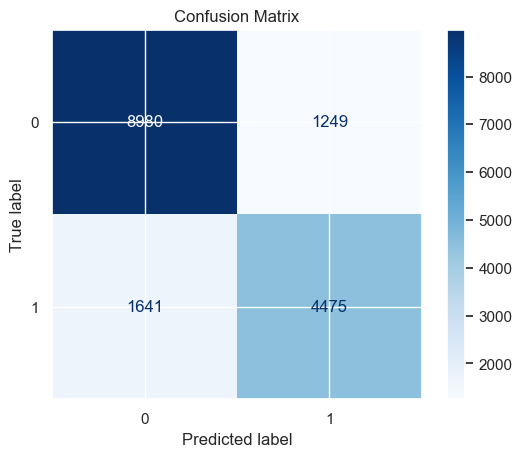

              precision    recall  f1-score   support

           0     0.8455    0.8779    0.8614     10229
           1     0.7818    0.7317    0.7559      6116

    accuracy                         0.8232     16345
   macro avg     0.8136    0.8048    0.8087     16345
weighted avg     0.8217    0.8232    0.8219     16345

Logistic Regression


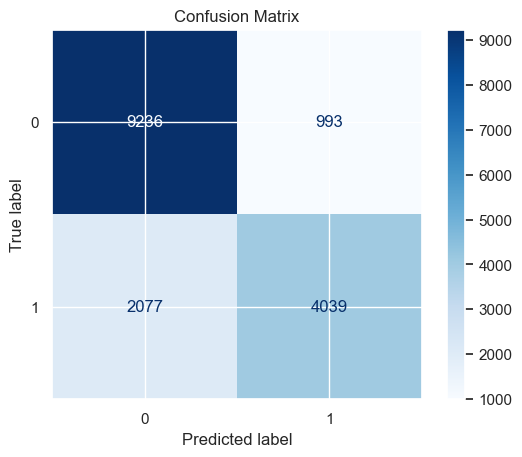

              precision    recall  f1-score   support

           0     0.8164    0.9029    0.8575     10229
           1     0.8027    0.6604    0.7246      6116

    accuracy                         0.8122     16345
   macro avg     0.8095    0.7817    0.7911     16345
weighted avg     0.8113    0.8122    0.8078     16345

Decision Tree


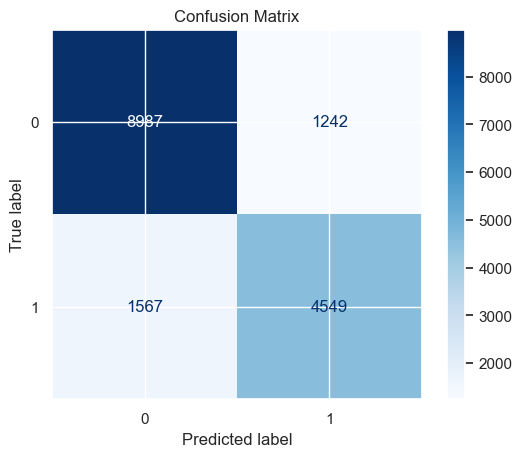

              precision    recall  f1-score   support

           0     0.8515    0.8786    0.8648     10229
           1     0.7855    0.7438    0.7641      6116

    accuracy                         0.8281     16345
   macro avg     0.8185    0.8112    0.8145     16345
weighted avg     0.8268    0.8281    0.8271     16345

Random Forest


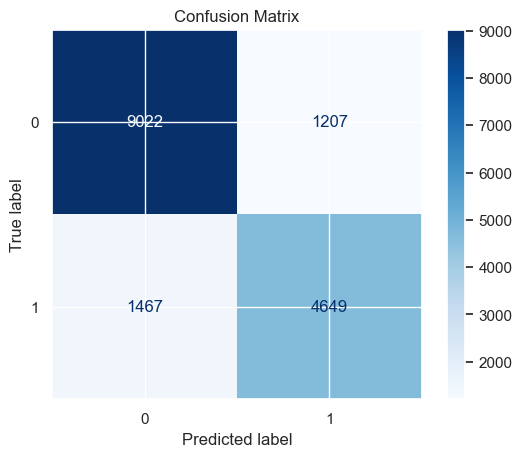

              precision    recall  f1-score   support

           0     0.8601    0.8820    0.8709     10229
           1     0.7939    0.7601    0.7766      6116

    accuracy                         0.8364     16345
   macro avg     0.8270    0.8211    0.8238     16345
weighted avg     0.8353    0.8364    0.8357     16345

Naive Bayes


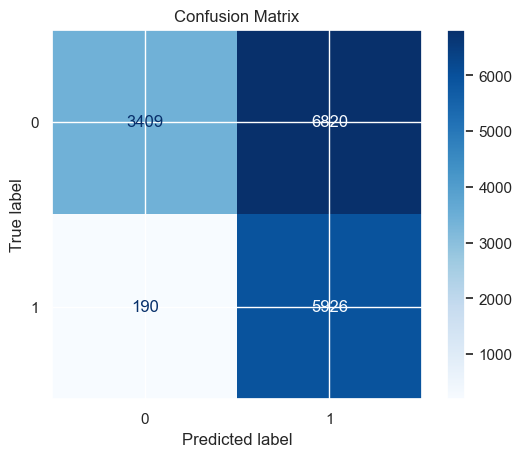

              precision    recall  f1-score   support

           0     0.9472    0.3333    0.4931     10229
           1     0.4649    0.9689    0.6284      6116

    accuracy                         0.5711     16345
   macro avg     0.7061    0.6511    0.5607     16345
weighted avg     0.7667    0.5711    0.5437     16345

AdaBoost


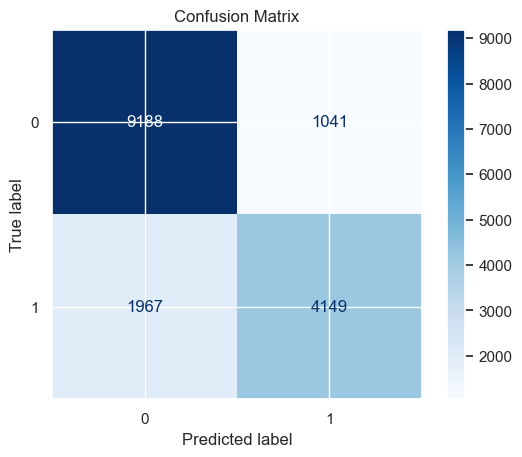

              precision    recall  f1-score   support

           0     0.8237    0.8982    0.8593     10229
           1     0.7994    0.6784    0.7339      6116

    accuracy                         0.8160     16345
   macro avg     0.8115    0.7883    0.7966     16345
weighted avg     0.8146    0.8160    0.8124     16345

XGBoost


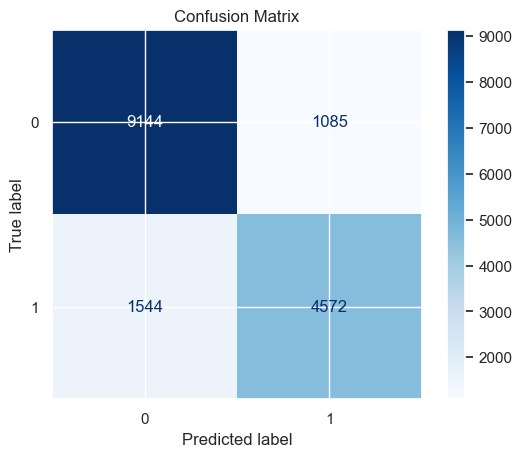

              precision    recall  f1-score   support

           0     0.8555    0.8939    0.8743     10229
           1     0.8082    0.7475    0.7767      6116

    accuracy                         0.8392     16345
   macro avg     0.8319    0.8207    0.8255     16345
weighted avg     0.8378    0.8392    0.8378     16345

CatBoost


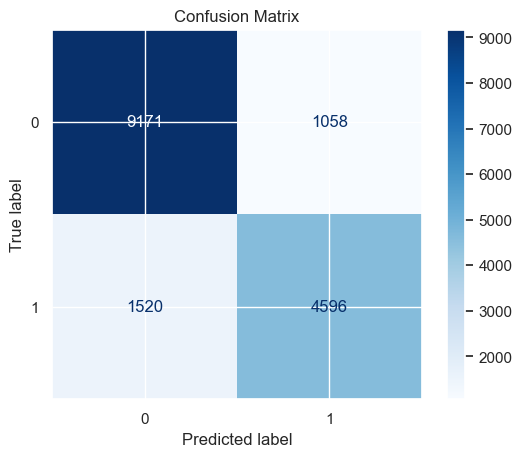

              precision    recall  f1-score   support

           0     0.8578    0.8966    0.8768     10229
           1     0.8129    0.7515    0.7810      6116

    accuracy                         0.8423     16345
   macro avg     0.8354    0.8240    0.8289     16345
weighted avg     0.8410    0.8423    0.8409     16345

LightGBM


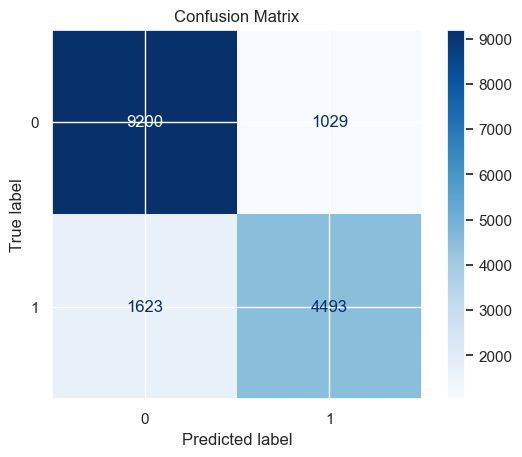

              precision    recall  f1-score   support

           0     0.8500    0.8994    0.8740     10229
           1     0.8137    0.7346    0.7721      6116

    accuracy                         0.8377     16345
   macro avg     0.8318    0.8170    0.8231     16345
weighted avg     0.8364    0.8377    0.8359     16345

Extra Tree


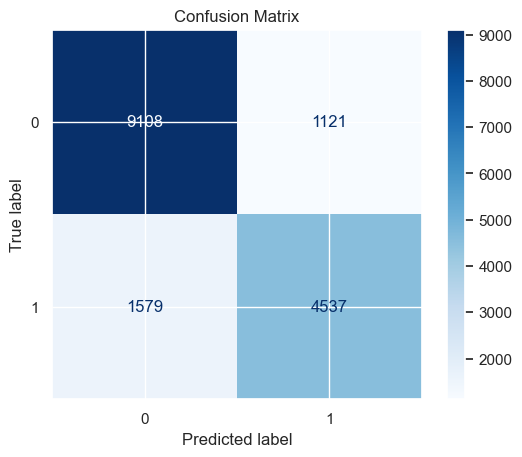

              precision    recall  f1-score   support

           0     0.8523    0.8904    0.8709     10229
           1     0.8019    0.7418    0.7707      6116

    accuracy                         0.8348     16345
   macro avg     0.8271    0.8161    0.8208     16345
weighted avg     0.8334    0.8348    0.8334     16345

CPU times: user 1min 48s, sys: 13.5 s, total: 2min 2s
Wall time: 34.4 s


In [85]:
%%time

models = [
    ('K-NN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state = 42, verbose = 0)),
    ('LightGBM', LGBMClassifier(random_state = 42, verbose =0)),
    ('Extra Tree', ExtraTreesClassifier(random_state = 42))
]

for model_name, model in models:
    model.fit(X_train_scaled, y_train)

# Evalution for Training
print("="*100)
print('Training') 
print("="*100)
    
for model_name, model in models:
    y_pred_train = model.predict(X_train_scaled)
    print(f'Model: {model_name}')
    print(classification_report(y_train, y_pred_train,digits=4))
    print("="*60)
    
# Evaluation for testing
print("="*100)
print('Testing') 
print("="*100)

for model_name, model in models:
    
    y_pred_test = model.predict(X_test_scaled)
    print(f'{model_name}')
    print("="*60)    

    cm = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)                                  
    disp.plot(cmap='Blues', values_format='d', ax = ax)
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred_test, digits=4))
    print("="*60)

In [86]:
f1_score_results = []

for model_name, model in models:
    y_pred_train = model.predict(X_train_scaled)
    score_train = f1_score(y_train, y_pred_train)*100
    
    y_pred_test = model.predict(X_test_scaled)
    score_test = f1_score(y_test, y_pred_test)*100
    
    y_pred_test = model.predict(X_test_scaled)
    score_fnr_test = 100-(recall_score(y_test, y_pred_test)*100)

    f1_score_results.append({
        'model': model_name,
        'f1_score_BS+CV': score_test,
        'f1_score_BS+CV_training': score_train,
        'difference_f1_score (%)': abs((score_train-score_test)*100/score_train),
        'fnr_score_BS+CV': score_fnr_test
    })

f1_score_BS_CV = pd.DataFrame(f1_score_results).sort_values(by='f1_score_BS+CV', ascending=False).reset_index(drop=True)

In [87]:
f1_score_BS_CV

model  f1_score_BS+CV  f1_score_BS+CV_training  \
0             CatBoost       78.096856                79.974541   
1              XGBoost       77.669243                79.460907   
2        Random Forest       77.664551                87.245542   
3             LightGBM       77.212579                78.100275   
4           Extra Tree       77.068116                86.976931   
5        Decision Tree       76.408835                86.976931   
6                 K-NN       75.591216                81.351016   
7             AdaBoost       73.394658                74.064601   
8  Logistic Regression       72.461428                73.114725   
9          Naive Bayes       62.835330                62.717715   

   difference_f1_score (%)  fnr_score_BS+CV  
0                 2.347853        24.852845  
1                 2.254774        25.245258  
2                10.981641        23.986266  
3                 1.136610        26.536952  
4                11.392463        25.817528  
5                12.150458        25.621321  
6                 7.080182        26.831262  
7                 0.904540        32.161543  
8                 0.893523        33.960105  
9                 0.187532         3.106606

## E.4 Undersampling

In [88]:
X = hotel_df.drop(columns = 'is_canceled').to_numpy()
y = hotel_df['is_canceled'].to_numpy()

In [89]:
stratify = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [91]:
X_us, y_us = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

In [92]:
scaler = MinMaxScaler()

X_us_scaled = scaler.fit_transform(X_us)
X_test_scaled = scaler.transform(X_test)

Training
Model: K-NN
              precision    recall  f1-score   support

           0     0.7700    0.9234    0.8398     24466
           1     0.9044    0.7241    0.8043     24466

    accuracy                         0.8238     48932
   macro avg     0.8372    0.8238    0.8220     48932
weighted avg     0.8372    0.8238    0.8220     48932

Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.7938    0.8227    0.8080     24466
           1     0.8160    0.7863    0.8009     24466

    accuracy                         0.8045     48932
   macro avg     0.8049    0.8045    0.8044     48932
weighted avg     0.8049    0.8045    0.8044     48932

Model: Decision Tree
              precision    recall  f1-score   support

           0     0.9025    0.9169    0.9097     24466
           1     0.9156    0.9010    0.9082     24466

    accuracy                         0.9089     48932
   macro avg     0.9090    0.9089    0.9089     48932
weigh

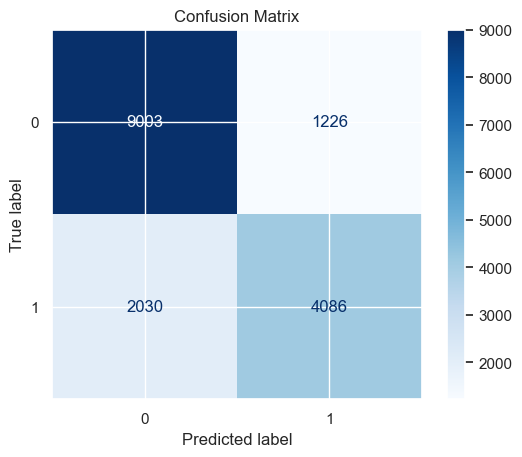

              precision    recall  f1-score   support

           0     0.8160    0.8801    0.8469     10229
           1     0.7692    0.6681    0.7151      6116

    accuracy                         0.8008     16345
   macro avg     0.7926    0.7741    0.7810     16345
weighted avg     0.7985    0.8008    0.7976     16345

Logistic Regression


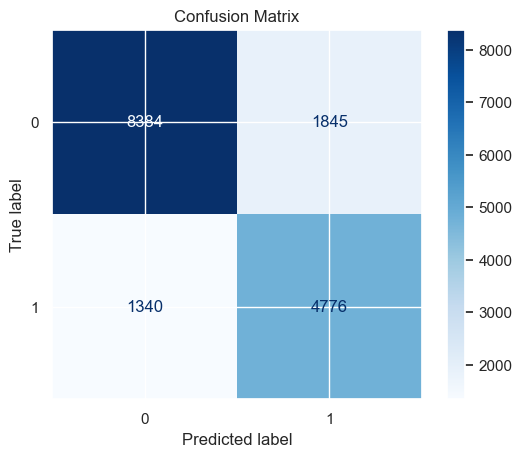

              precision    recall  f1-score   support

           0     0.8622    0.8196    0.8404     10229
           1     0.7213    0.7809    0.7499      6116

    accuracy                         0.8051     16345
   macro avg     0.7918    0.8003    0.7952     16345
weighted avg     0.8095    0.8051    0.8065     16345

Decision Tree


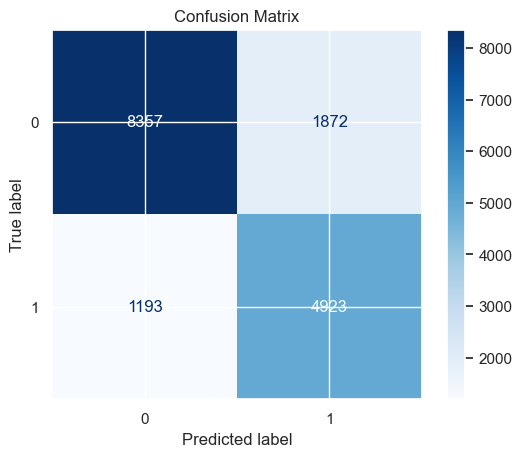

              precision    recall  f1-score   support

           0     0.8751    0.8170    0.8450     10229
           1     0.7245    0.8049    0.7626      6116

    accuracy                         0.8125     16345
   macro avg     0.7998    0.8110    0.8038     16345
weighted avg     0.8187    0.8125    0.8142     16345

Random Forest


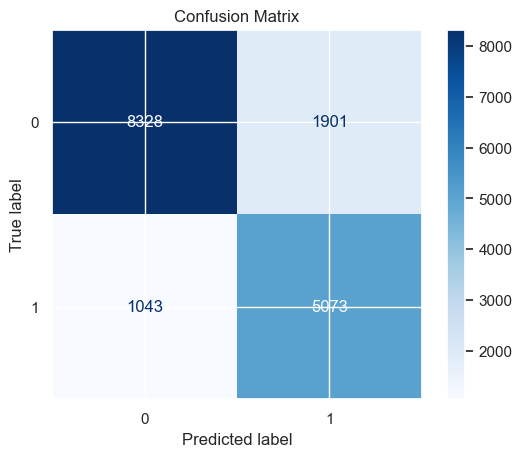

              precision    recall  f1-score   support

           0     0.8887    0.8142    0.8498     10229
           1     0.7274    0.8295    0.7751      6116

    accuracy                         0.8199     16345
   macro avg     0.8081    0.8218    0.8124     16345
weighted avg     0.8284    0.8199    0.8218     16345

Naive Bayes


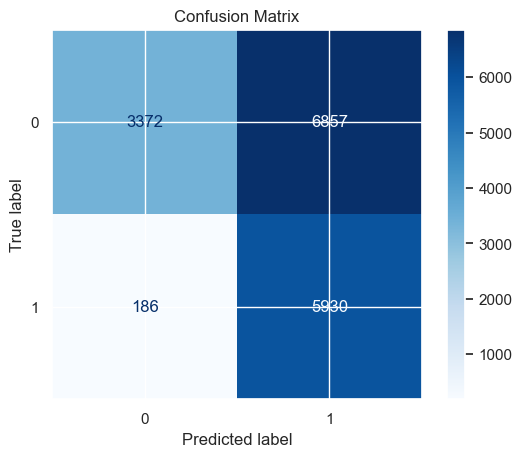

              precision    recall  f1-score   support

           0     0.9477    0.3297    0.4892     10229
           1     0.4638    0.9696    0.6274      6116

    accuracy                         0.5691     16345
   macro avg     0.7057    0.6496    0.5583     16345
weighted avg     0.7666    0.5691    0.5409     16345

AdaBoost


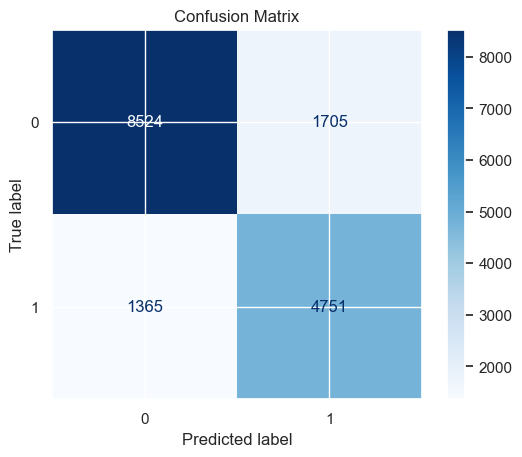

              precision    recall  f1-score   support

           0     0.8620    0.8333    0.8474     10229
           1     0.7359    0.7768    0.7558      6116

    accuracy                         0.8122     16345
   macro avg     0.7989    0.8051    0.8016     16345
weighted avg     0.8148    0.8122    0.8131     16345

XGBoost


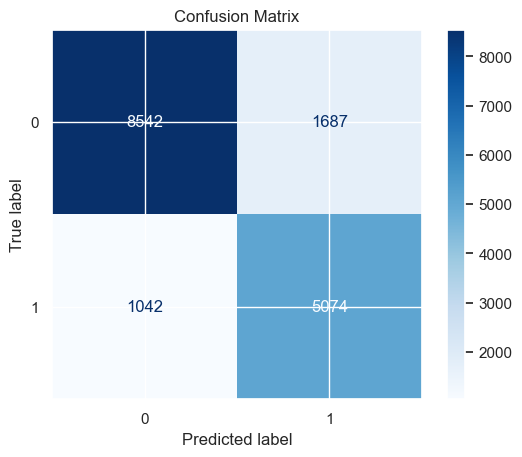

              precision    recall  f1-score   support

           0     0.8913    0.8351    0.8623     10229
           1     0.7505    0.8296    0.7881      6116

    accuracy                         0.8330     16345
   macro avg     0.8209    0.8324    0.8252     16345
weighted avg     0.8386    0.8330    0.8345     16345

CatBoost


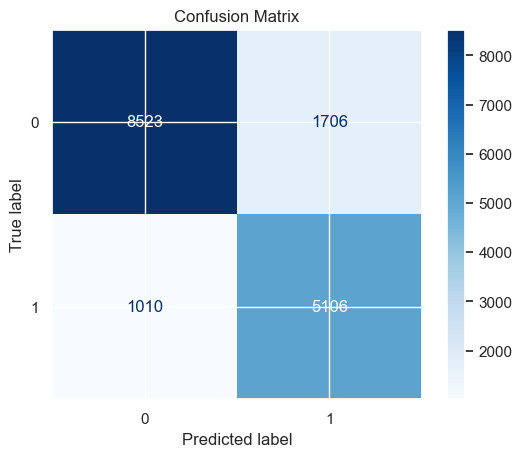

              precision    recall  f1-score   support

           0     0.8941    0.8332    0.8626     10229
           1     0.7496    0.8349    0.7899      6116

    accuracy                         0.8338     16345
   macro avg     0.8218    0.8340    0.8262     16345
weighted avg     0.8400    0.8338    0.8354     16345

LightGBM


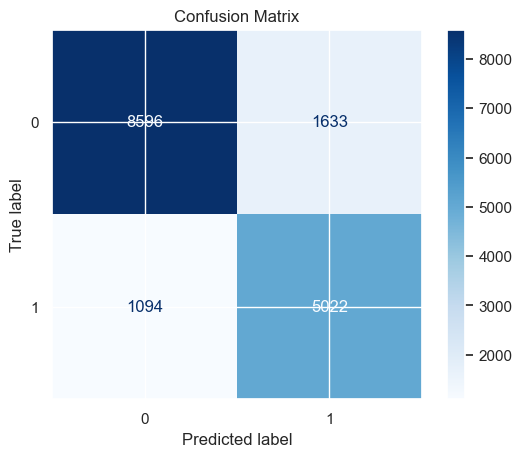

              precision    recall  f1-score   support

           0     0.8871    0.8404    0.8631     10229
           1     0.7546    0.8211    0.7865      6116

    accuracy                         0.8332     16345
   macro avg     0.8209    0.8307    0.8248     16345
weighted avg     0.8375    0.8332    0.8344     16345

Extra Tree


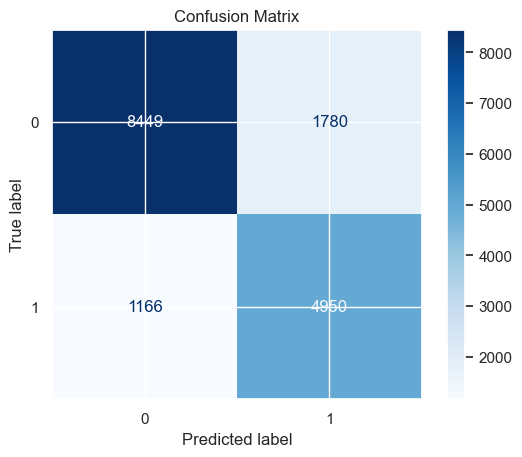

              precision    recall  f1-score   support

           0     0.8787    0.8260    0.8515     10229
           1     0.7355    0.8094    0.7707      6116

    accuracy                         0.8198     16345
   macro avg     0.8071    0.8177    0.8111     16345
weighted avg     0.8251    0.8198    0.8213     16345

CPU times: user 1min 18s, sys: 13.4 s, total: 1min 32s
Wall time: 26 s


In [93]:
%%time

models = [
    ('K-NN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state = 42, verbose = 0)),
    ('LightGBM', LGBMClassifier(random_state = 42, verbose =0)),
    ('Extra Tree', ExtraTreesClassifier(random_state = 42))
]

for model_name, model in models:

    model.fit(X_us_scaled, y_us)

# Evalution for Training
print("="*100)
print('Training') 
print("="*100)
    
for model_name, model in models:
    y_pred_train = model.predict(X_us_scaled)
    print(f'Model: {model_name}')
    print(classification_report(y_us, y_pred_train,digits=4))
    print("="*60)
    
# Evaluation for testing
print("="*100)
print('Testing') 
print("="*100)

for model_name, model in models:
    
    y_pred_test = model.predict(X_test_scaled)
    print(f'{model_name}')
    print("="*60)    

    cm = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)                                  
    disp.plot(cmap='Blues', values_format='d', ax = ax)
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred_test, digits=4))
    print("="*60)

In [94]:
f1_score_results = []

for model_name, model in models:
    y_pred_train = model.predict(X_us_scaled)
    score_train = f1_score(y_us, y_pred_train)*100

    y_pred_test = model.predict(X_test_scaled)
    score_test = f1_score(y_test, y_pred_test)*100
    
    y_pred_test = model.predict(X_test_scaled)
    score_fnr_test = 100-(recall_score(y_test, y_pred_test)*100)

    f1_score_results.append({
        'model': model_name,
        'f1_score_US': score_test,
        'f1_score_US_training': score_train,
        'difference_f1_score (%)': abs((score_train-score_test)*100/score_train),
        'fnr_score_US': score_fnr_test
    })

f1_score_US = pd.DataFrame(f1_score_results).sort_values(by='f1_score_US', ascending=False).reset_index(drop=True)

In [95]:
f1_score_US 

model  f1_score_US  f1_score_US_training  \
0             CatBoost    78.991337             84.970720   
1              XGBoost    78.807176             84.889935   
2             LightGBM    78.646934             83.611238   
3        Random Forest    77.509549             91.000141   
4           Extra Tree    77.066791             90.820321   
5        Decision Tree    76.260553             90.820321   
6             AdaBoost    75.580655             80.363858   
7  Logistic Regression    74.994112             80.085760   
8                 K-NN    71.508575             80.429453   
9          Naive Bayes    62.741364             73.318195   

   difference_f1_score (%)  fnr_score_US  
0                 7.036992     16.514061  
1                 7.165467     17.037279  
2                 5.937363     17.887508  
3                14.824803     17.053630  
4                15.143670     19.064748  
5                16.031399     19.506213  
6                 5.951932     22.318509  
7                 6.357745     21.909745  
8                11.091556     33.191629  
9                14.425930      3.041203

## E.4 Oversampling

In [96]:
X = hotel_df.drop(columns = 'is_canceled').to_numpy()
y = hotel_df['is_canceled'].to_numpy()

In [97]:
stratify = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [99]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

In [100]:
X_over_smote, y_over_smote = SMOTE(random_state = 42).fit_resample(X_train, y_train)

In [101]:
X_over_smote_df = pd.DataFrame(X_over_smote)
y_over_smote_df = pd.DataFrame(y_over_smote, columns=['is_canceled'])
df_oversampling_smote = pd.concat([X_over_smote_df, y_over_smote_df], axis=1)

df_oversampling_smote

0     1         2         3    4    5    6         7    8    9  ...  \
0      2.0   9.0  1.000000  0.401498  0.0  1.0  0.0  0.000000  1.0  0.0  ...   
1      3.0   8.0  1.000000  0.401498  0.0  1.0  0.0  1.000000  1.0  0.0  ...   
2      3.0   8.0  1.000000  0.002068  1.0  1.0  0.0  0.000000  1.0  0.0  ...   
3      2.0  10.0  1.000000  0.401498  0.0  1.0  0.0  0.000000  1.0  0.0  ...   
4      1.0  12.0  1.000000  0.008786  1.0  1.0  0.0  0.000000  1.0  0.0  ...   
...    ...   ...       ...       ...  ...  ...  ...       ...  ...  ...  ...   
65455  2.0   8.0  1.000000  0.401498  1.0  1.0  0.0  0.000000  1.0  1.0  ...   
65456  2.0  12.0  0.110391  0.401498  0.0  0.0  0.0  0.110391  1.0  0.0  ...   
65457  3.0   6.0  1.000000  0.401498  0.0  1.0  0.0  0.000000  1.0  0.0  ...   
65458  3.0   6.0  1.000000  0.017620  1.0  1.0  0.0  0.000000  1.0  0.0  ...   
65459  2.0   7.0  1.000000  0.071264  1.0  1.0  0.0  0.000000  1.0  0.0  ...   

        11   12   13   14   15   16        17   18   19  is_canceled  
0      1.0  0.0  0.0  1.0  1.0  0.0  0.000000  1.0  0.0            0  
1      1.0  0.0  0.0  1.0  1.0  0.0  0.000000  1.0  1.0            1  
2      1.0  0.0  0.0  1.0  4.0  0.0  0.000000  1.0  1.0            1  
3      1.0  0.0  1.0  1.0  1.0  0.0  0.000000  1.0  1.0            0  
4      1.0  0.0  0.0  1.0  1.0  0.0  0.000000  0.0  1.0            1  
...    ...  ...  ...  ...  ...  ...       ...  ...  ...          ...  
65455  1.0  0.0  0.0  1.0  3.0  0.0  0.116521  1.0  1.0            1  
65456  0.0  0.0  0.0  1.0  4.0  0.0  1.000000  1.0  1.0            1  
65457  1.0  0.0  0.0  1.0  3.0  0.0  0.000000  1.0  1.0            1  
65458  1.0  0.0  0.0  1.0  2.0  0.0  0.000000  1.0  1.0            1  
65459  1.0  0.0  0.0  1.0  4.0  0.0  1.000000  1.0  1.0            1  

[65460 rows x 21 columns]

In [102]:
df_oversampling_smote.is_canceled.value_counts()

is_canceled
0    32730
1    32730
Name: count, dtype: int64

In [103]:
scaler = MinMaxScaler()

X_over_smote_scaled = scaler.fit_transform(X_over_smote)

X_test_scaled = scaler.transform(X_test)
X_test_val_scaled = scaler.transform(X_test_val)

Training
Model: K-NN
              precision    recall  f1-score   support

           0     0.8507    0.8933    0.8715     32730
           1     0.8877    0.8432    0.8649     32730

    accuracy                         0.8683     65460
   macro avg     0.8692    0.8683    0.8682     65460
weighted avg     0.8692    0.8683    0.8682     65460

Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.7930    0.8215    0.8070     32730
           1     0.8149    0.7856    0.8000     32730

    accuracy                         0.8036     65460
   macro avg     0.8040    0.8036    0.8035     65460
weighted avg     0.8040    0.8036    0.8035     65460

Model: Decision Tree
              precision    recall  f1-score   support

           0     0.9200    0.9223    0.9211     32730
           1     0.9221    0.9198    0.9209     32730

    accuracy                         0.9210     65460
   macro avg     0.9210    0.9210    0.9210     65460
weigh

K-NN


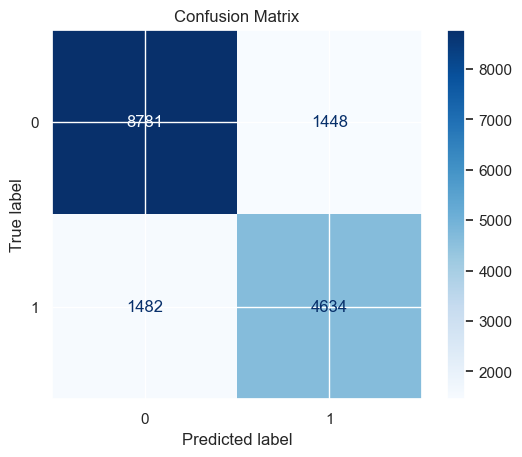

              precision    recall  f1-score   support

           0     0.8556    0.8584    0.8570     10229
           1     0.7619    0.7577    0.7598      6116

    accuracy                         0.8207     16345
   macro avg     0.8088    0.8081    0.8084     16345
weighted avg     0.8205    0.8207    0.8206     16345

Logistic Regression


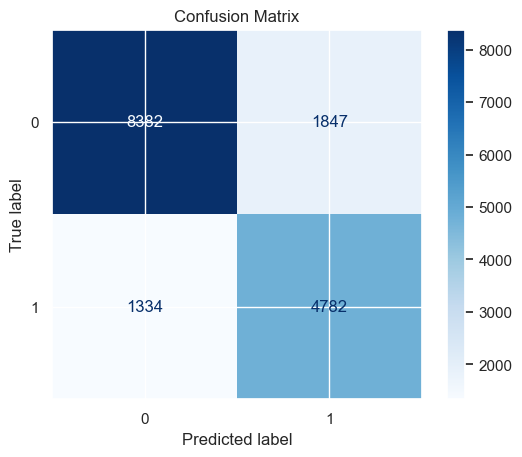

              precision    recall  f1-score   support

           0     0.8627    0.8194    0.8405     10229
           1     0.7214    0.7819    0.7504      6116

    accuracy                         0.8054     16345
   macro avg     0.7920    0.8007    0.7955     16345
weighted avg     0.8098    0.8054    0.8068     16345

Decision Tree


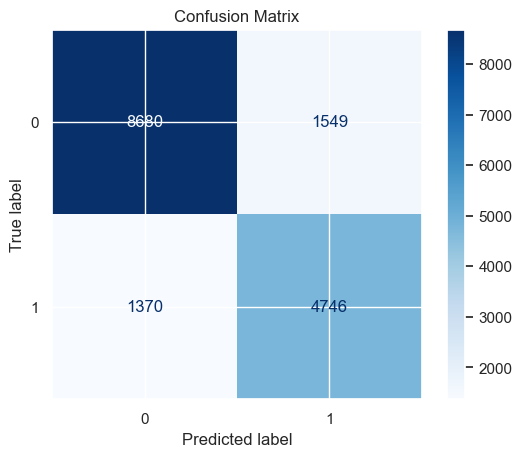

              precision    recall  f1-score   support

           0     0.8637    0.8486    0.8561     10229
           1     0.7539    0.7760    0.7648      6116

    accuracy                         0.8214     16345
   macro avg     0.8088    0.8123    0.8104     16345
weighted avg     0.8226    0.8214    0.8219     16345

Random Forest


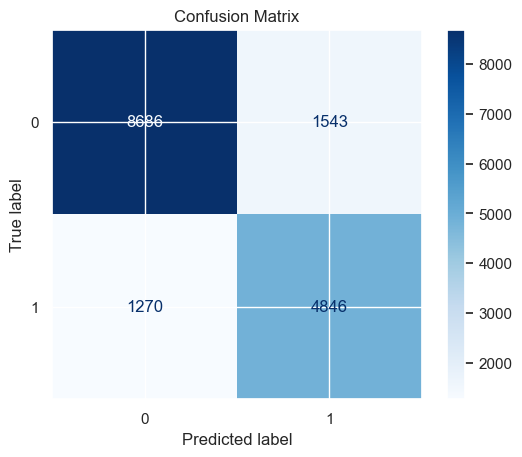

              precision    recall  f1-score   support

           0     0.8724    0.8492    0.8606     10229
           1     0.7585    0.7923    0.7750      6116

    accuracy                         0.8279     16345
   macro avg     0.8155    0.8208    0.8178     16345
weighted avg     0.8298    0.8279    0.8286     16345

Naive Bayes


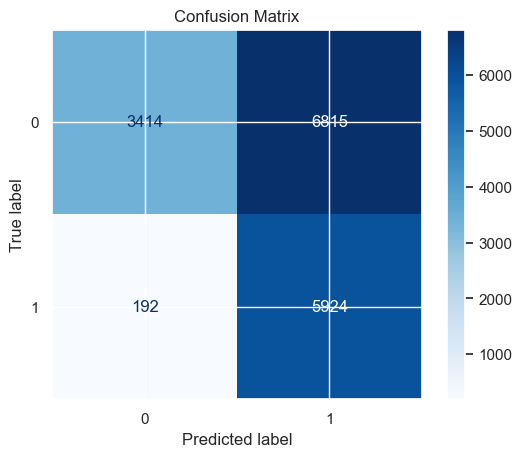

              precision    recall  f1-score   support

           0     0.9468    0.3338    0.4935     10229
           1     0.4650    0.9686    0.6284      6116

    accuracy                         0.5713     16345
   macro avg     0.7059    0.6512    0.5610     16345
weighted avg     0.7665    0.5713    0.5440     16345

AdaBoost


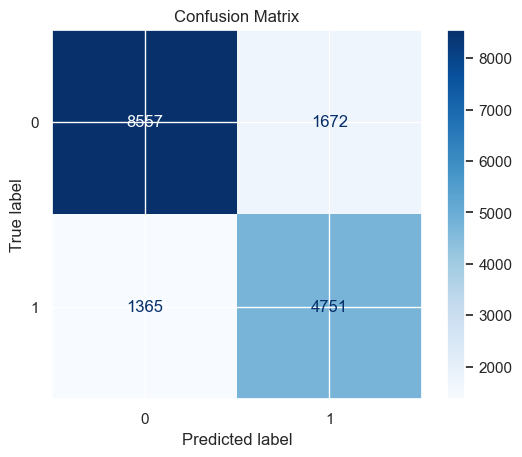

              precision    recall  f1-score   support

           0     0.8624    0.8365    0.8493     10229
           1     0.7397    0.7768    0.7578      6116

    accuracy                         0.8142     16345
   macro avg     0.8011    0.8067    0.8035     16345
weighted avg     0.8165    0.8142    0.8151     16345

XGBoost


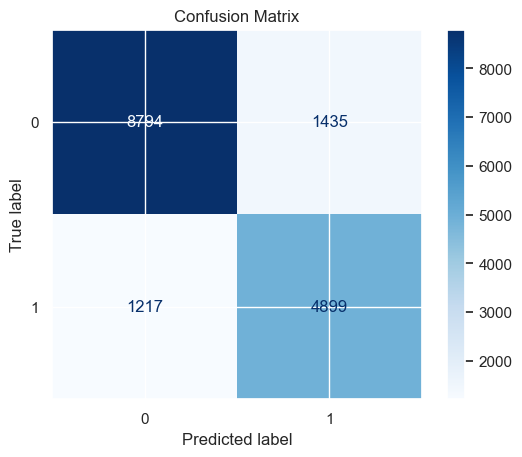

              precision    recall  f1-score   support

           0     0.8784    0.8597    0.8690     10229
           1     0.7734    0.8010    0.7870      6116

    accuracy                         0.8377     16345
   macro avg     0.8259    0.8304    0.8280     16345
weighted avg     0.8391    0.8377    0.8383     16345

CatBoost


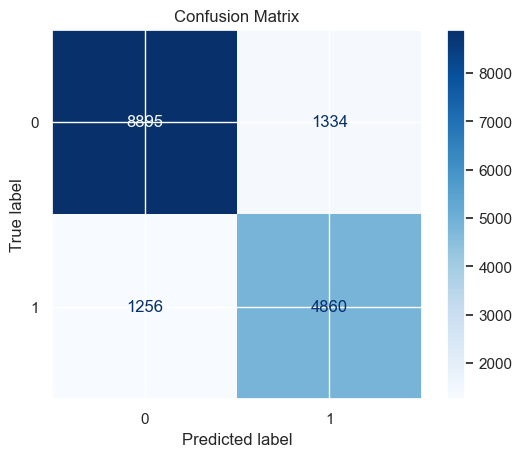

              precision    recall  f1-score   support

           0     0.8763    0.8696    0.8729     10229
           1     0.7846    0.7946    0.7896      6116

    accuracy                         0.8415     16345
   macro avg     0.8304    0.8321    0.8313     16345
weighted avg     0.8420    0.8415    0.8417     16345

LightGBM


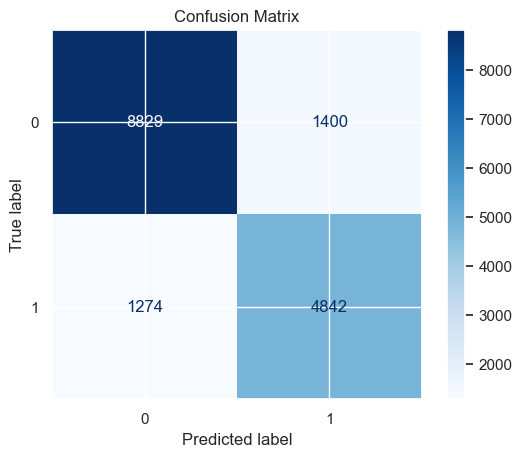

              precision    recall  f1-score   support

           0     0.8739    0.8631    0.8685     10229
           1     0.7757    0.7917    0.7836      6116

    accuracy                         0.8364     16345
   macro avg     0.8248    0.8274    0.8261     16345
weighted avg     0.8372    0.8364    0.8367     16345

Extra Tree


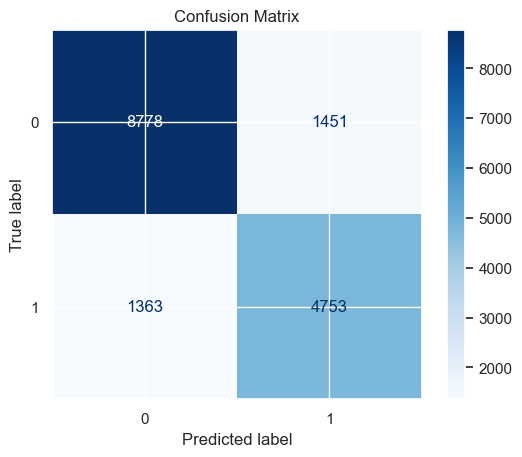

              precision    recall  f1-score   support

           0     0.8656    0.8581    0.8619     10229
           1     0.7661    0.7771    0.7716      6116

    accuracy                         0.8278     16345
   macro avg     0.8159    0.8176    0.8167     16345
weighted avg     0.8284    0.8278    0.8281     16345

CPU times: user 2min 13s, sys: 17.3 s, total: 2min 30s
Wall time: 37 s


In [104]:
%%time

models = [
    ('K-NN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state = 42, verbose = 0)),
    ('LightGBM', LGBMClassifier(random_state = 42, verbose = 0)),
    ('Extra Tree', ExtraTreesClassifier(random_state = 42))
]

for model_name, model in models:
    model.fit(X_over_smote_scaled, y_over_smote)
    
# Evalution for Training
print("="*100)
print('Training') 
print("="*100)
    
for model_name, model in models:
    y_pred_train = model.predict(X_over_smote_scaled)
    print(f'Model: {model_name}')
    print(classification_report(y_over_smote, y_pred_train,digits=4))
    print("="*60)

# Evalution for validation
print("="*100)
print('Validation') 
print("="*100)

for model_name, model in models:
    y_pred_val = model.predict(X_test_val_scaled)
    print(f'Model: {model_name}')
    print(classification_report(y_test_val, y_pred_val,digits=4))
    print("="*60)
    
# Evaluation for testing
print("="*100)
print('Testing') 
print("="*100)

for model_name, model in models:
    
    y_pred_test = model.predict(X_test_scaled)
    print(f'{model_name}')
    print("="*60)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)                                  
    disp.plot(cmap='Blues', values_format='d', ax=ax)
    plt.title('Confusion Matrix')
    plt.show()
    
    print(classification_report(y_test, y_pred_test,digits=4))
    print("="*60)

In [105]:
from sklearn.metrics import f1_score

f1_score_results = []

for model_name, model in models:
    y_pred_train = model.predict(X_over_smote_scaled)
    score_train = f1_score(y_over_smote, y_pred_train)*100
    
    y_pred_test = model.predict(X_test_scaled)
    score_test = f1_score(y_test, y_pred_test)*100
    
    y_pred_test = model.predict(X_test_scaled)
    score_fnr_test = 100-(recall_score(y_test, y_pred_test)*100)


    f1_score_results.append({
        'model': model_name,
        'f1_score_OS': score_test,
        'f1_score_OS_training': score_train,
        'difference_f1_score (%)': abs((score_train-score_test)*100/score_train),
        'fnr_score_OS': score_fnr_test
    })

f1_score_OS = pd.DataFrame(f1_score_results).sort_values(by='f1_score_OS', ascending=False).reset_index(drop=True)

In [106]:
f1_score_OS

model  f1_score_OS  f1_score_OS_training  \
0             CatBoost    78.960195             87.184055   
1              XGBoost    78.698795             86.704335   
2             LightGBM    78.362195             85.994488   
3        Random Forest    77.504998             92.218994   
4           Extra Tree    77.159091             92.093550   
5        Decision Tree    76.480541             92.093550   
6                 K-NN    75.979669             86.487418   
7             AdaBoost    75.779568             81.069258   
8  Logistic Regression    75.041193             79.996889   
9          Naive Bayes    62.837444             73.633303   

   difference_f1_score (%)  fnr_score_OS  
0                 9.432757     20.536298  
1                 9.233148     19.898627  
2                 8.875329     20.830608  
3                15.955494     20.765206  
4                16.216618     22.285808  
5                16.953422     22.400262  
6                12.149454     24.231524  
7                 6.524903     22.318509  
8                 6.194861     21.811642  
9                14.661653      3.139307

## E.8 Feature Importance

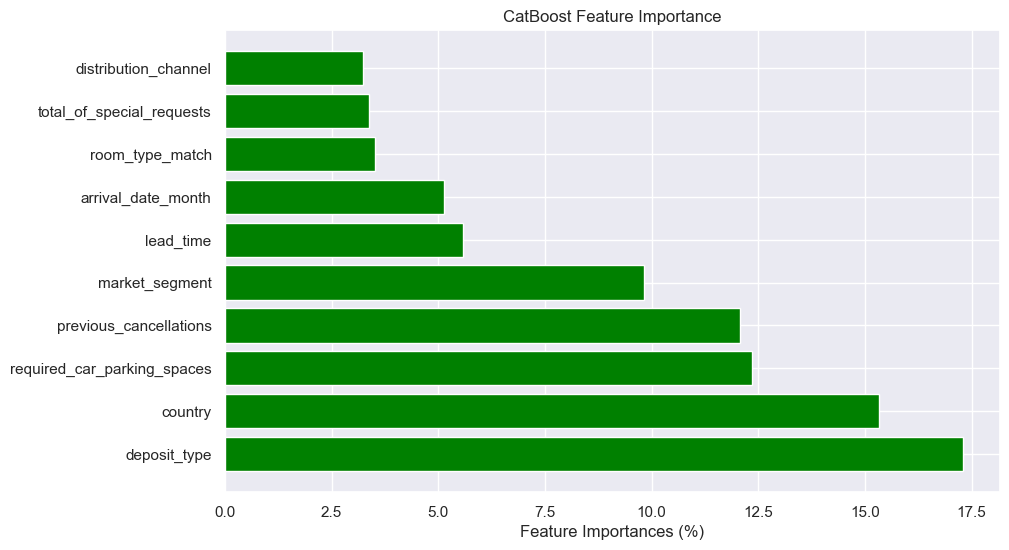

In [107]:
X = hotel_df.drop(columns='is_canceled').to_numpy()
y = hotel_df['is_canceled'].to_numpy()

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Undersampling
X_us, y_us = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

#Scaling
scaler = MinMaxScaler()

X_us_scaled = scaler.fit_transform(X_us)
X_test_scaled = scaler.transform(X_test)

#Training
model = CatBoostClassifier(random_state=42, verbose=0)
model.fit(X_us_scaled, y_us)

#Feature importance
feature_importance = model.feature_importances_

#Percentage
feature_importance_percentage = (feature_importance / feature_importance.sum()) * 100

#Dataframe
importance_df = pd.DataFrame({'Feature': hotel_df.drop(columns='is_canceled').columns, 'Importance': feature_importance_percentage})

#Sort Top 10
top_features = importance_df.sort_values(by='Importance', ascending=False)[:10]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='green')
plt.xlabel("Feature Importances (%)")
plt.title('CatBoost Feature Importance')
plt.show()